<a href="https://colab.research.google.com/github/reachusama/product-review-analysis/blob/main/Personal_Python_Notebooks_and_Scripting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Usama Shahid**
---


```
1: Explore the dataset
2: Generate embeddings for textual reviews using OpenAI (Babbage engine) & Sentence Transformers.
3: Label Reviews's Valence & Arousal
  -- Prompt engineering using GPT3's Davnci engine
  -- Label the dataset for Valence & Arousal using designed prompts with GPT3
4: Use ML models to build classifiers for Valence & Arousal.
  -- Used OpenAI's embeddings and labels generated via prompt engineering as input & output sets.
5: Once Valence & Arousal quadrants specified, picked reviews and performed fast clustering using GPT3's embeddings.
6: Analysing reviews and clusters in each quadrant
```

```
All Datasets Import & Exports:
https://drive.google.com/drive/folders/1lCXtBDIzX16p6OapdZpoC5Z545DkHeSJ?usp=sharing
```

In [331]:
# To share the envirnoment
pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.4
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
desc

In [1]:
!pip install pandas
!pip install numpy
!pip install openai
!pip install retry
!pip install -U sentence-transformers
!pip install transformers
!pip install sklearn
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 147 kB 9.4 MB/s 
  Created wheel for openai: filename=openai-0.25.0-py3-none-any.whl size=55880 sha256=dac8cef719f512d53f933eb89e0b738ad0126c253a6b2a0504c5a4d3a6cfb193
  Stored in directory: /root/.cache/pip/wheels/4b/92/33/6f57c7aae0b16875267999a50570e81f15eecec577ebe05a2e
Successfully built openai
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whee

In [277]:
# Loading, exploring and manipulating datasets
import pandas as pd
import numpy as np
import random
from google.colab import drive

# Error Handling for API calling and importing API keys from envirnoment.
from retry import retry
import time
from time import sleep
import os

# Using gpt3 completions, embeddings and generating multiclass precion-recall
import openai
from openai.embeddings_utils import plot_multiclass_precision_recall

# For tokeizing text to perform validation for GPT3
from transformers import GPT2TokenizerFast

# ML models for classifiers, dimensionality reduction, model analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# For fast clustering and embeddings
from sentence_transformers import SentenceTransformer, util
import torch

# Visualisation
import matplotlib.pyplot as plt
import matplotlib

# Model exports & imports
import pickle

# for removing warnings
import warnings

In [3]:
# contants for setting base_path for each user to switch easily.
BASE_PATH = "/content/drive/MyDrive/Product Reviews/Dataset"
RETRY_COUNT = 5
SLEEP_THRESHOLD = 3
openai.api_key = os.getenv("OPENAI_API_KEY")

In [4]:
# Mounting Google Drive for Fetching Datasets
drive.mount('/content/drive')

Mounted at /content/drive


In [279]:
# Ignores warnings
warnings.simplefilter("ignore")

# Dataset Exploration
---
**Author: Usama Shahid**



In [ ]:
# reading json 
df = pd.read_json(f"{BASE_PATH}/chunk_1.json")

In [ ]:
# view first 5 rows
df.head()

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,is_verified,badge,reviews_count,brand,asin,warning
0,R4I8PJ9FR0GF3,FALSE ADVERTISING!!!!!! NOT AS ADVERISED! ALL ...,If I could give this a ZERO RATING I would!! I...,mrslokuntry,B0822KNQKT,/gp/profile/amzn1.account.AGXQQFG2AR4GEFCG66Q4...,AGXQQFG2AR4GEFCG66Q4VXBIW22A,1.0,"November 17, 2020",2020-11-17T00:00:00.000Z,1.0,Verified Purchase,107.0,Chef's Path,B0822KNQKT,NaN
1,R1KHEH6D35PXM,"Weird, acrid chemical smell in the lids.",I was looking forward to using these container...,Ruthulhu,B0822KNQKT,/gp/profile/amzn1.account.AHXI6HJME6CETZ3YD2B4...,AHXI6HJME6CETZ3YD2B4CQMJNT5A,1.0,"September 25, 2020",2020-09-25T00:00:00.000Z,1.0,Verified Purchase,107.0,Chef's Path,B0822KNQKT,NaN
2,R35MGJ0HDCABLM,Buyer Beware- NOTHING like the picture,*BUYER BEWARE * NOTHING. LIKE. THE. PICTURE. I...,Melvin,B0822KNQKT,/gp/profile/amzn1.account.AE5N76YYXL6AZ6PHSAKO...,AE5N76YYXL6AZ6PHSAKO7JEHYATQ,1.0,"January 10, 2021",2021-01-10T00:00:00.000Z,1.0,Verified Purchase,107.0,Chef's Path,B0822KNQKT,NaN
3,RK4HRLNJWC7MT,This is what I get for being busy,I have been busy mom and not able to shop in s...,sara,B0822KNQKT,/gp/profile/amzn1.account.AG75BU26YPWSV2VYH3OC...,AG75BU26YPWSV2VYH3OCSOAXBS7A,1.0,"February 13, 2021",2021-02-13T00:00:00.000Z,1.0,Verified Purchase,107.0,Chef's Path,B0822KNQKT,NaN
4,RWGBX6LYL6KXK,TOO SMALL!!,I’m not quite sure why I thought these contain...,Tiffany Siess,B0822KNQKT,/gp/profile/amzn1.account.AER56RPU2HDRG7D7AKQ5...,AER56RPU2HDRG7D7AKQ5JYATNK5A,1.0,"November 16, 2020",2020-11-16T00:00:00.000Z,1.0,Verified Purchase,107.0,Chef's Path,B0822KNQKT,NaN


In [ ]:
# view last 5 rows
df.tail()

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,is_verified,badge,reviews_count,brand,asin,warning
99995,R2PVJ8KELJPCAO,7 piece outdoor sectional,Nice set,AK,B09DNYFFVG,/gp/profile/amzn1.account.AF77M5MTAQBQ7KYXTF5Q...,AF77M5MTAQBQ7KYXTF5QNJ63CLOQ,5.0,"October 24, 2020",2020-10-24T00:00:00.000Z,1.0,Verified Purchase,11.0,Gotland,B09DNYFFVG,NaN
99996,R1AEYH2QOLCQHH,Awesome furniture,Great patio furniture set. Great communication...,Amazon Customer,B09DNYFFVG,/gp/profile/amzn1.account.AHHEW37CDVM5ZUFNNUUA...,AHHEW37CDVM5ZUFNNUUAGCKYODXQ,5.0,"February 23, 2021",2021-02-23T00:00:00.000Z,1.0,Verified Purchase,11.0,Gotland,B09DNYFFVG,NaN
99997,RBVTUGVC8B4LA,Love our outdoor sofa!,I had been looking for an outdoor sofa for qui...,Peggy Jackson,B09DNYFFVG,/gp/profile/amzn1.account.AFGRRGOMXK6Q3LWZA7S2...,AFGRRGOMXK6Q3LWZA7S2QN5JAE7A,5.0,"August 18, 2020",2020-08-18T00:00:00.000Z,0.0,,11.0,Gotland,B09DNYFFVG,NaN
99998,RUURQ2WAM7RH,Very strong rubber odor,"Very strong rubber odor, I have left the knock...",Kurt,B07BDK71TR,/gp/profile/amzn1.account.AGZU2UOA4BCV5DHYRRTC...,AGZU2UOA4BCV5DHYRRTCFIQIDP2A,1.0,"August 28, 2019",2019-08-28T00:00:00.000Z,1.0,Verified Purchase,8.0,Apexstone,B07BDK71TR,NaN
99999,R21IHDS0F74O90,Product won’t last long. Already falling apart,I have not had this very long at all and alrea...,Connie Trinkle,B07BDK71TR,/gp/profile/amzn1.account.AFTD2XCTEHJNUJMVPUWP...,AFTD2XCTEHJNUJMVPUWPNPDQ35GA,1.0,"August 21, 2020",2020-08-21T00:00:00.000Z,1.0,Verified Purchase,8.0,Apexstone,B07BDK71TR,NaN


In [ ]:
# rows, columns in the dataset
df.shape

(100000, 16)

In [ ]:
# All columns datatypes, names and value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             99100 non-null  object 
 1   review_header         99100 non-null  object 
 2   review_text           99100 non-null  object 
 3   author_name           99100 non-null  object 
 4   review_asin           99100 non-null  object 
 5   author_link           99100 non-null  object 
 6   author_id             99100 non-null  object 
 7   rating                99100 non-null  float64
 8   review_posted_date    99100 non-null  object 
 9   review_posted_date_f  99100 non-null  object 
 10  is_verified           99100 non-null  float64
 11  badge                 99100 non-null  object 
 12  reviews_count         99100 non-null  float64
 13  brand                 99023 non-null  object 
 14  asin                  99100 non-null  object 
 15  warning           

In [ ]:
# Checking for stats
df.describe(include='all')

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,is_verified,badge,reviews_count,brand,asin,warning
count,99100,99100,99100,99100,99100,99100,99100,99100.000000,99100,99100,99100.000000,99100,99100.000000,99023,99100,900
unique,84259,65645,83010,61057,3456,78854,78854,NaN,2990,2990,NaN,2,NaN,173,2145,1
top,R1THWVAXH96IAF,Five Stars,Good,Amazon Customer,B07PF8NV7N,,,NaN,"June 29, 2021",2021-06-29T00:00:00.000Z,NaN,Verified Purchase,NaN,Wildone,B0822KNQKT,"page was crawled, but didn't produce any data"
freq,16,452,137,6086,490,4002,4002,NaN,202,202,NaN,96302,NaN,7154,100,900
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.365409,NaN,NaN,0.971766,NaN,166.590898,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.491036,NaN,NaN,0.165642,NaN,538.540078,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,NaN,16.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,38.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,1.000000,NaN,110.000000,NaN,NaN,NaN


In [ ]:
# Selecting columns of concern from the dataset
df = df[["review_id", "review_header", "review_text", "rating", "review_posted_date", "is_verified", "reviews_count", "brand"]]

In [ ]:
df.head()

,review_id,review_header,review_text,rating,review_posted_date,is_verified,reviews_count,brand
0,R4I8PJ9FR0GF3,FALSE ADVERTISING!!!!!! NOT AS ADVERISED! ALL ...,If I could give this a ZERO RATING I would!! I...,1.0,"November 17, 2020",1.0,107.0,Chef's Path
1,R1KHEH6D35PXM,"Weird, acrid chemical smell in the lids.",I was looking forward to using these container...,1.0,"September 25, 2020",1.0,107.0,Chef's Path
2,R35MGJ0HDCABLM,Buyer Beware- NOTHING like the picture,*BUYER BEWARE * NOTHING. LIKE. THE. PICTURE. I...,1.0,"January 10, 2021",1.0,107.0,Chef's Path
3,RK4HRLNJWC7MT,This is what I get for being busy,I have been busy mom and not able to shop in s...,1.0,"February 13, 2021",1.0,107.0,Chef's Path
4,RWGBX6LYL6KXK,TOO SMALL!!,I’m not quite sure why I thought these contain...,1.0,"November 16, 2020",1.0,107.0,Chef's Path


In [ ]:
# Checking different brands in the dataset
df["brand"].unique()

array(["Chef's Path", 'fullstar', 'Fullstar', 'OXO', 'Utopia Home',
       'Vtopmart', 'Wildone', 'NATURELO', 'Ultrean', 'Amazon Renewed',
       'Englander', 'Ensenior', 'ComfiLife', 'Live Conscious',
       'Ebanel Laboratories', 'Wisteria Lane', 'tobeDRI',
       'Totally Kitchen', 'Hidrate Spark', 'Coffee Gator', 'TookMag',
       'PhysioNatural', 'House Ur Home', 'ORDORA', 'Ola Prima',
       'TheraGun', 'InteVision', 'oaskys', 'SpriteGru', "Rockin' Green",
       'Everlasting Comfort', 'Incredible Bulk', 'Utopia Kitchen',
       'PECULA', 'BUG BITE THING', 'Homey Pet', "will's", 'EdenProducts',
       'DAYBETTER', '', 'Nieifi', 'Biling', 'Scriveiner',
       'Circadian Optics', 'Cotton Paradise', 'ONNAIS', 'Monument Grills',
       'CrystalTowels', 'Weigh Gram', 'SMARTRO', '500Labels', '1 Body',
       'COVAX', 'Pupford', 'ODesign', 'Sifely', 'MERRYBOX', 'KAC',
       'Annova', 'GOOD LIFE USA', 'Good Life USA', 'POWEROWL',
       'Home Intuition', 'SODUKU', 'Homestead Choice', 'B

In [ ]:
# The count of each brand's revies in the dataset
df['brand'].value_counts()

Wildone               2865
Utopia Kitchen        2347
OXO                   2250
SIGNORA WARE          2194
Vtopmart              2013
                      ... 
Fullstar                38
BLACKSMITH FAMILY       30
Vriksasana Posture      10
elv                      8
Gaggle                   3
Name: brand, Length: 173, dtype: int64

In [ ]:
# dropping duplicates based on 'review_header', 'review_text'
df.drop_duplicates(subset=['review_header', 'review_text'], inplace=True)

In [ ]:
df.shape

(83926, 8)

In [ ]:
# dropping null rows based on 'review_header', 'review_text'
df.dropna(subset=['review_header', 'review_text'], inplace=True)

In [ ]:
df.shape

(83926, 8)

In [ ]:
df['brand'].value_counts()

Wildone               2865
Utopia Kitchen        2347
OXO                   2250
SIGNORA WARE          2194
Vtopmart              2013
                      ... 
Fullstar                38
BLACKSMITH FAMILY       30
Vriksasana Posture      10
elv                      8
Gaggle                   3
Name: brand, Length: 173, dtype: int64

In [ ]:
df.to_csv(f"{BASE_PATH}/chunk_1_preprocessed.csv", index=None)

# Common Functions
---
**Author: Usama Shahid**



In [5]:
def read_and_preprocess_dataset(file_path: str="", 
                                is_csv: bool=True,
                                cleanse_dataset: bool=True,
                                transform_columns: bool=True,
                                cols:list=["review_id", 
                                           "review_header", 
                                           "review_text", 
                                           "rating", 
                                           "review_posted_date", 
                                           "is_verified", 
                                           "reviews_count", 
                                           "brand"]
                                ):
    """
    The module reads and manipulates the datasets are returns a dataframe
    :param file_path: input_file_path
    :param is_csv: whether the file to read is csv or json
    :param cleanse_dataset: should perform cleaning or not
    :param transform_columns: whether to refactor the columns
    :param cols: the cols to use for refactor
    :return: dataframe
    """
  
  try:
    df = pd.read_csv(file_path) if is_csv else pd.read_json(file_path)

    if cleanse_dataset:
      df.drop_duplicates(subset=["review_header", "review_text"], 
                         inplace=True)
      df.dropna(subset=["review_header", "review_text"], 
                inplace=True)
    
    if transform_columns:
      df = df[cols]

    return df
  except Exception as e:
    print(f"Exception(read_and_preprocess_dataset): ", e)
    return None

In [6]:
def get_tokenized_string(text: str):
    """

    :param text: string to genrate tokens for
    :return: list of tokens : [1,2,3]
    """
  tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
  return tokenizer.encode(text)

In [7]:
def balance_dataset_based_on_categories(df, target_column="valence", category_values=[]):
    """
    The function balances the dataset by filtering based on a column and given values

    :param df: 
    :param target_column: the column to use for filtering
    :param category_values: the category values to use for filteration
    :return:
    """
  try:
    dataframes = []
    for category in category_values:
      dummy = df.loc[df[target_column] == category]
      dataframes.append(dummy)

    lengths = [len(frame) for frame in dataframes]
    max_length = min(lengths)
    resized_dataframes = []

    for i, frame in enumerate(dataframes):
      dataframes[i] = dataframes[i][:max_length]

    return pd.concat(dataframes)

  except Exception as e:
    return f"Error(balance_dataset_based_on_categories): {e}"

# Generating Embeddings
---

**Author: Usama Shahid**



## Sentence Transformers Embeddings

**References:**
* https://www.sbert.net/examples/applications/computing-embeddings/README.html

In [ ]:
df = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_1_preprocessed.csv")

In [ ]:
df.head(1)

,review_id,review_header,review_text,rating,review_posted_date,is_verified,reviews_count,brand
0,R4I8PJ9FR0GF3,FALSE ADVERTISING!!!!!! NOT AS ADVERISED! ALL ...,If I could give this a ZERO RATING I would!! I...,1.0,"November 17, 2020",1.0,107.0,Chef's Path


In [ ]:
df.shape

(83861, 8)

In [ ]:
# Combing review header and title to get one string for generating emebeddings
df['combined'] = "Title: " + df.review_header.str.strip() + "; Content: " + df.review_text.str.strip()

In [ ]:
df.head()

,review_id,review_header,review_text,rating,review_posted_date,is_verified,reviews_count,brand,combined
0,R4I8PJ9FR0GF3,FALSE ADVERTISING!!!!!! NOT AS ADVERISED! ALL ...,If I could give this a ZERO RATING I would!! I...,1.0,"November 17, 2020",1.0,107.0,Chef's Path,Title: FALSE ADVERTISING!!!!!! NOT AS ADVERISE...
1,R1KHEH6D35PXM,"Weird, acrid chemical smell in the lids.",I was looking forward to using these container...,1.0,"September 25, 2020",1.0,107.0,Chef's Path,"Title: Weird, acrid chemical smell in the lids..."
2,R35MGJ0HDCABLM,Buyer Beware- NOTHING like the picture,*BUYER BEWARE * NOTHING. LIKE. THE. PICTURE. I...,1.0,"January 10, 2021",1.0,107.0,Chef's Path,Title: Buyer Beware- NOTHING like the picture;...
3,RK4HRLNJWC7MT,This is what I get for being busy,I have been busy mom and not able to shop in s...,1.0,"February 13, 2021",1.0,107.0,Chef's Path,Title: This is what I get for being busy; Cont...
4,RWGBX6LYL6KXK,TOO SMALL!!,I’m not quite sure why I thought these contain...,1.0,"November 16, 2020",1.0,107.0,Chef's Path,Title: TOO SMALL!!; Content: I’m not quite sur...


In [ ]:
# loading the model
STE_model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
# feeding list of all strings and generating encodings for each row
STE_embeddings = STE_model.encode(df.combined.values, convert_to_tensor=False)

In [ ]:
# Visualsing embeddings for one row only to save space in notebook
for sentence, embedding in zip(df.combined.values, STE_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

Sentence: Title: FALSE ADVERTISING!!!!!! NOT AS ADVERISED! ALL SMALL CONTAINERS!!!; Content: If I could give this a ZERO RATING I would!! I bought these because they had more good reviews than bad. I should have listened to the BAD reviewers! I finally got around to cleaning my pantry and was excited to use these. Unfortunately, These are ALL SMALL containers! SEE PHOTO OF PASTA IN CONTATINER! How am I supposed to get the lid on without breaking up the pasta? NOW I'M OUT $45 BECAUSE THEY CAN'T BE RETURNED!!!!! They are hard to close and some won't close all the way and they smell!! I guess that's why they have a no return policy. I will do as my husband told me next time I order from Amazon," Make sure that you can return it before you purchase." DON'T BUY THESE, YOU CAN GET SOME FROM THE DOLLAR STORE FOR LESS!!!!!
Embedding: [-5.3986e-03,  6.6709e-03,  1.4786e-02,  6.8348e-02,  8.8113e-02,
        -5.2730e-02,  5.7512e-02, -6.2546e-02,  2.4495e-02, -7.8612e-02,
         6.1970e-02,  1

In [ ]:
df["STE_embeddings"] = ""

In [ ]:
# Assinging embeddings one by one to our dataframe
for index, embedding in enumerate(df.STE_embeddings.values):
    df["STE_embeddings"].iloc[index] = embedding

In [ ]:
df.head()

,review_id,review_header,review_text,rating,review_posted_date,is_verified,reviews_count,brand,combined,STE_embeddings
0,R4I8PJ9FR0GF3,FALSE ADVERTISING!!!!!! NOT AS ADVERISED! ALL ...,If I could give this a ZERO RATING I would!! I...,1.0,"November 17, 2020",1.0,107.0,Chef's Path,Title: FALSE ADVERTISING!!!!!! NOT AS ADVERISE...,"[-5.3986e-03, 6.6709e-03, 1.4786e-02, 6.834..."
1,R1KHEH6D35PXM,"Weird, acrid chemical smell in the lids.",I was looking forward to using these container...,1.0,"September 25, 2020",1.0,107.0,Chef's Path,"Title: Weird, acrid chemical smell in the lids...","[ 6.6079e-02, -4.7454e-02, 5.3329e-02, 3.106..."
2,R35MGJ0HDCABLM,Buyer Beware- NOTHING like the picture,*BUYER BEWARE * NOTHING. LIKE. THE. PICTURE. I...,1.0,"January 10, 2021",1.0,107.0,Chef's Path,Title: Buyer Beware- NOTHING like the picture;...,"[-5.3846e-02, 1.0647e-01, 8.3936e-04, 2.314..."
3,RK4HRLNJWC7MT,This is what I get for being busy,I have been busy mom and not able to shop in s...,1.0,"February 13, 2021",1.0,107.0,Chef's Path,Title: This is what I get for being busy; Cont...,"[-5.8914e-02, 9.8236e-03, 3.6367e-02, 5.050..."
4,RWGBX6LYL6KXK,TOO SMALL!!,I’m not quite sure why I thought these contain...,1.0,"November 16, 2020",1.0,107.0,Chef's Path,Title: TOO SMALL!!; Content: I’m not quite sur...,"[ 3.4800e-02, 3.8797e-02, 1.0047e-02, -5.306..."


In [ ]:
df.to_csv(f"{BASE_PATH}/chunk_1_STE_embeddings.csv", index=None)

## OpenAI Embeddings - Babbage

**References:**

* https://beta.openai.com/docs/guides/embeddings/what-are-embeddings

In [ ]:
df = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2.json", is_csv=False)

In [ ]:
df.head()

,review_id,review_header,review_text,rating,review_posted_date,is_verified,reviews_count,brand
0,R176WUN6YB5Y2J,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",1.0,"March 19, 2021",1.0,8.0,Apexstone
1,RWSJHY80TLLZW,SMELLS awful,has that horrible harbor freight VOC smell.. f...,1.0,"May 16, 2020",1.0,8.0,Apexstone
2,R2NPVTFY0ZRCK9,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,1.0,"August 25, 2021",1.0,8.0,Apexstone
3,RURFK88JSDXAD,"Knock Knock, broken",After 1 month it falls apart,1.0,"May 6, 2020",1.0,8.0,Apexstone
4,R28R3CJZSSCRM7,Smelled like burning rubber,Looks great but stunk up my entire house even ...,1.0,"November 8, 2021",1.0,8.0,Apexstone


In [ ]:
df.shape

(97687, 8)

In [ ]:
df = df.loc[:25000]

In [ ]:
df.shape

(24360, 8)

In [ ]:
df['combined'] = "Title: " + df.review_header.str.strip() + "; Content: " + df.review_text.str.strip()

In [ ]:
# Getting the count of tokens against each string
df["n_tokens"] = df.combined.apply(lambda x: get_tokenized_string(x))

In [ ]:
# Filtering rows based on number of tokens to make sure we don't have too lengthy strings
# Because OpenAI Limit is 2048 for babbage
df = df[df.n_tokens<2000]

In [ ]:
def get_openai_embeddings(model: str = "text-similarity-babbage-001", input: str = ""):
    """
    This module generates embeddings using OpenAI for any given string.
    
    :param model: model to use, such ad davinci, babbage, ada, curie
    :param input: the input string
    :return:
    """
  for i in range(RETRY_COUNT):
    try:
      embeddings = openai.Embedding.create(
        model=model,
        input=input
      )
      return embeddings["data"][0]["embedding"]
    except Exception as e:
      print(f"Error(get_openai_embeddings): ", e)
      sleep(SLEEP_THRESHOLD)

In [ ]:
# Testing OpenAI embeddings module setup
get_openai_embeddings(input="HELLO !")

[0.012614703737199306,
 -0.016512639820575714,
 0.013773763552308083,
 -0.014385049231350422,
 0.0084944823756814,
 -0.0020958350505679846,
 -0.006247811019420624,
 0.003612139727920294,
 0.006581239402294159,
 -0.05068109929561615,
 0.0020462176762521267,
 0.043726738542318344,
 0.029675116762518883,
 0.013757886365056038,
 0.01527419127523899,
 0.000374858733266592,
 0.01978341117501259,
 -0.02776981331408024,
 -0.00044357869774103165,
 0.03480356186628342,
 0.12524200975894928,
 0.001280126511119306,
 -0.017751086503267288,
 -0.026039160788059235,
 -0.007637095637619495,
 -0.01299576461315155,
 -0.03648658096790314,
 0.022387327626347542,
 -0.019989820197224617,
 -0.02157757431268692,
 0.027436384931206703,
 0.016941333189606667,
 0.02567397803068161,
 -0.008923175744712353,
 -0.015051905997097492,
 -0.006299412809312344,
 0.02721409872174263,
 -0.042329516261816025,
 0.0019688147585839033,
 -0.023371735587716103,
 -0.008589747361838818,
 0.0064343721605837345,
 0.03597849979996681,

In [ ]:
# Using apply to function to run "get_openai_embeddings" module for each row
df["babbage_similarity"] = df.combined.apply(lambda x: get_openai_embeddings(x))

In [ ]:
df.head()

,review_id,review_header,review_text,rating,review_posted_date,is_verified,reviews_count,brand,combined,n_tokens,babbage_similarity
0,R176WUN6YB5Y2J,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",1.0,"March 19, 2021",1.0,8.0,Apexstone,"Title: Stinky, sloppy cut hose.; Content: It w...",78.0,"[0.00666764285415411, 0.022180898115038872, -0..."
1,RWSJHY80TLLZW,SMELLS awful,has that horrible harbor freight VOC smell.. f...,1.0,"May 16, 2020",1.0,8.0,Apexstone,Title: SMELLS awful; Content: has that horribl...,34.0,"[0.002960040932521224, 0.011734704487025738, -..."
2,R2NPVTFY0ZRCK9,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,1.0,"August 25, 2021",1.0,8.0,Apexstone,Title: Terrible Rubber Smell; Content: Thought...,53.0,"[0.02114497497677803, 0.016543280333280563, -0..."
3,RURFK88JSDXAD,"Knock Knock, broken",After 1 month it falls apart,1.0,"May 6, 2020",1.0,8.0,Apexstone,"Title: Knock Knock, broken; Content: After 1 m...",15.0,"[0.006736414507031441, 0.015398834832012653, -..."
4,R28R3CJZSSCRM7,Smelled like burning rubber,Looks great but stunk up my entire house even ...,1.0,"November 8, 2021",1.0,8.0,Apexstone,Title: Smelled like burning rubber; Content: L...,29.0,"[0.012572546489536762, 0.021474963054060936, 0..."


In [ ]:
df.shape

(25001, 11)

In [ ]:
df.to_csv(f"{BASE_PATH}/chunk_2_Openai_babbage_embeddings.csv", index=None)

# Valence & Arousal 
---
**Author: Usama Shahid**
```
The goal is to combine topic clusters with two dimensions of emotions (Arousal and Valence)

Emotions are distributed in a two-dimensional circular space, containing arousal and valence dimensions.

Arousal represents the vertical axis and valence represents the horizontal axis, 
while the center of the circle represents a neutral valence and a medium level of arousal.

- Valence (is the review written in a positive or negative mood/style)
- Arousal (from Calm - Exited)
- Context (Service-Specific → Product-Specific) OR Topics 
```


![Valence and Arousal](https://drive.google.com/uc?export=view&id=1chWRWB9kg7C_6N_czxLJztSh0VHWI7UX)



```
Interface Class for Handling Request with OpenAI
```

In [22]:
class OpenAI:
  @retry(exceptions=Exception, tries=RETRY_COUNT, delay=SLEEP_THRESHOLD)
  def get_completion(self, 
                     model: str = "text-davinci-003",
                     prompt: str = "",
                     temperature: float = 0.7,
                     max_tokens: int = 1000,
                     top_p: int = 1,
                     frequency_penalty: float = 0,
                     presence_penalty: float = 0):
      """

      :param model: davinci, curie, babbage, ada
      :param prompt: the engineered string to use for getting results
      :param temperature: float
      :param max_tokens: int
      :param top_p: float
      :param frequency_penalty: float
      :param presence_penalty: float
      :return:
      """
    try:
      response = openai.Completion.create(
        model=model,
        prompt=prompt,
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        frequency_penalty=frequency_penalty,
        presence_penalty=presence_penalty
      )

      return str(response["choices"][0]["text"]).strip()

    except Exception as e:
      print(f"Error(OpenAI: get_commpletion): ", e)
      

  
  def get_valence_labelling_prompt(self, 
                                   review_text: str, 
                                   review_header: str):
      """
      This module converts review into enginereed prompt format. 

      :param review_text: 
      :param review_header:
      :return:
      """
    
    st = "Decide based on Review Header and Review Text whether the Review's"
    st += " Valence is positive, neutral, or negative."
    st += f"\nReview Header: {review_header}"
    st += f"\nReview Text: {review_text}"
    st += "\nValence:"

    return st

  def get_arousal_labelling_prompt(self, 
                                   review_text: str, 
                                   review_header: str):
      """
      This module converts review into enginereed prompt format.
      
      :param self:
      :param review_text:
      :param review_header:
      :return:
      """
    st = "Decide based on Review Header and Review Text whether the Review's"
    st += " Arousal is high, neutral, or low."
    st += f"\nReview Header: {review_header}"
    st += f"\nReview Text: {review_text}"
    st += "\nArousal:"

    return st

```
Interface Class for Handling Machine Learning Model Training, Loading, Prediciton and so on.
```

In [23]:
class Model:
  def __init__(self,
               is_model_loading: bool=False,
               model_name: str="", 
               input_data: list=[], 
               output: list=[], 
               labels:list=[]):
    """
    This class is used for training, fine-tuning model to ensure usabiliy.

    :param is_model_loading: whether intializing the class for loading a model OR creating an instance for training
    :param model_name: classifier or svc
    :param input_data: the input features
    :param output: ouput list
    :param labels: catgeorical values
    """
    if not is_model_loading:
      if len(model_name) == 0 or len(input_data) == 0 or len(output) == 0:
        raise Exception("Model: Invalid Initialization")

    self.models = ["classifier", "svc"]
    self.model_name = model_name
    self.input_data = input_data
    self.output = output
    self.labels = labels

  def split_data(self, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(
        self.input_data, 
        self.output, 
        test_size=test_size, 
        random_state=42
    )
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test    

  def train(self, **kwargs):
    if self.model_name in self.models:
      start_time = time.time()

      if self.model_name == "classifier":
        self.model = RandomForestClassifier(**kwargs)
        self.model.fit(self.X_train, self.y_train)

      elif self.model_name == "svc":
        self.model = SVC(kernel = 'linear', C = 1, **kwargs)
        self.model.fit(self.X_train, self.y_train)
      
      end_time = round(time.time() - start_time, 2)
      print(f"{self.model_name.upper()} Model Training Done after {end_time} sec")

    else:
      return "Invalid Model"

  def predict(self, input=[]):
    if len(input) > 0:
      return self.model.predict(input)      
    self.preds = self.model.predict(self.X_test)

  def report(self):
    return classification_report(self.y_test, self.preds)

  
  def plot_precision_recall(self):
    self.probas = self.model.predict_proba(self.X_test)
    plot_multiclass_precision_recall(self.probas, 
                                     self.y_test, 
                                     self.labels, 
                                     self.model)
  
  def save_model(self, file_name):
    pickle.dump(self.model, open(file_name, 'wb'))
 
  def load_model(self, file_name):
    self.model = pickle.load(open(file_name, 'rb'))

## Generating Valence and Arousal Datasets
```
Use OpenAI and GPT3's via Prompt Engineering to Label our dataset for Valence & Arousal.
```

In [ ]:
# creating openai interface object
ob_openai = OpenAI()

### Valence Processing

In [ ]:
df_valence = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2.json",
                                          is_csv=False,
                                          cols=["review_header", 
                                                "review_text"],
                                         )

In [ ]:
df_valence.head()

,review_header,review_text
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ..."
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...
3,"Knock Knock, broken",After 1 month it falls apart
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...


In [ ]:
df_valence.shape

(95953, 2)

In [ ]:
df_valence["valence"] = ""

In [ ]:
df_valence.head()

,review_header,review_text,valence
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,
3,"Knock Knock, broken",After 1 month it falls apart,
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,


In [ ]:
def get_valence_label(row):
  row = dict(row)
  prompt = ob_openai.get_valence_labelling_prompt(row["review_text"], row["review_header"])
  return ob_openai.get_completion(prompt=prompt, 
                                  temperature=0.8, 
                                  frequency_penalty=2, 
                                  presence_penalty=0) 

In [ ]:
get_valence_label({"review_text": "I hate this product!", "review_header": "Stinky, sloppy cut hose"})

'Negative'

In [ ]:
df_valence["valence"] = df_valence.apply(lambda row: get_valence_label(row))

In [ ]:
df_valence.head()

,review_header,review_text,valence
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",negative
3,SMELLS awful,has that horrible harbor freight VOC smell.. f...,negative
4,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,negative
5,"Knock Knock, broken",After 1 month it falls apart,negative
6,Smelled like burning rubber,Looks great but stunk up my entire house even ...,negative


In [ ]:
df_valence.to_csv(f"{BASE_PATH}/chunk_2_valence_labeled.csv", index=False)

### Arousal Processing

In [ ]:
df_arousal = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2.json",
                                         is_csv=False,
                                         cols=["review_header", 
                                                "review_text"])

In [ ]:
df_arousal.head()

,review_header,review_text
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ..."
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...
3,"Knock Knock, broken",After 1 month it falls apart
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...


In [ ]:
df_arousal.shape

(95953, 7)

In [ ]:
def get_arousal_label(row):

  row = dict(row)
  prompt = ob_openai.get_arousal_labelling_prompt(row["review_text"], row["review_header"])
  return ob_openai.get_completion(prompt=prompt, 
                                  temperature=0.8, 
                                  frequency_penalty=2, 
                                  presence_penalty=0) 

In [ ]:
get_arousal_label({"review_text": "I hate this product!", "review_header": "Stinky, sloppy cut hose"})

'High'

In [ ]:
df_arousal["arousal"] = df_arousal.apply(lambda row: get_arousal_label(row))

In [ ]:
df_arousal.head()

,review_header,review_text,arousal
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",low
3,SMELLS awful,has that horrible harbor freight VOC smell.. f...,high
4,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,low
5,"Knock Knock, broken",After 1 month it falls apart,low
6,Smelled like burning rubber,Looks great but stunk up my entire house even ...,high


In [ ]:
df_arousal.to_csv(f"{BASE_PATH}/chunk_2_arousal_labeled.csv", index=False)

## Pre-processing Datasets for Valence & Arousal
```
Removing inconsistency such as:
  -- Duplicates
  -- Nulls
  -- Unwanted values
  -- Noise categories and so on
```

### Valence Processing

In [ ]:
df_valence = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_valence_labeled.csv",
                                          transform_columns=False,
                                          cleanse_dataset=False)

In [ ]:
df_valence.head()

,review_header,review_text,valence
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",negative
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,negative
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,negative
3,"Knock Knock, broken",After 1 month it falls apart,negative
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,negative


In [ ]:
df_valence.shape

(95953, 3)

In [ ]:
df_valence.valence.nunique()

101

In [ ]:
df_valence.valence.unique()

array(['negative', 'neutral', 'positive', 'good', 'good value',
       'good enough before it falls apart',
       'the valence is negative because the product does not help my dog and her discomfort.',
       'the valence is positive because the product worked for one person and did not work for another.',
       'the valence is positive because the brush is good for other self cleaning brushes.',
       'the valence of this review is positive.',
       'the valence is positive because the set of supports seems to keep the lid from slamming shut.',
       'the text is positive, as the two items are different and have a different use.',
       'the valence is negative because the company does not improve the lid open time of the strut.',
       'the text is negative.', 'the valence of this review is neutral.',
       '5 stars',
       "the valence is positive because the review is positive about the product's performance.",
       'the valence of a gas spring is positive.',
       'the

In [ ]:
legal_columns = ['negative', 'neutral', 'positive']

In [ ]:
df_valence = df_valence[df_valence["valence"].isin(legal_columns)]

In [ ]:
df_valence.valence.unique(), df_valence.valence.nunique()

(array(['negative', 'neutral', 'positive'], dtype=object), 3)

In [ ]:
df_valence["valence"].value_counts()

positive    42605
neutral     30173
negative    13865
Name: valence, dtype: int64

In [ ]:
df_valence.shape

(86643, 3)

In [ ]:
df_valence.to_csv(f"{BASE_PATH}/chunk_2_valence_ready.csv", index=False)

### Arousal Processing

In [ ]:
df_arousal = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_arousal_labeled.csv",
                                          transform_columns=False,
                                          cleanse_dataset=False)

In [ ]:
df_arousal.head()

,review_header,review_text,arousal
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",low
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,high
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,low
3,"Knock Knock, broken",After 1 month it falls apart,low
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,high


In [ ]:
df_arousal.shape

(95953, 3)

In [ ]:
df_arousal.arousal.nunique()

349

In [ ]:
df_arousal.arousal.unique()

array(['low', 'high', 'good', 'good for', 'good value', '3',
       'three stars', 'neutral', 'good product', 'near perfect', 'great',
       'good item', '5', 'good in', 'good pressure', 'good deal',
       'good overall', nan, '3 stars', 'good practice', '3/',
       'low quality', '4', '4/', 'medium to', 'good price', '2.',
       'good quality', 'average', 'good stuff', 'medium', 'good purchase',
       'good buy', 'great for', 'excellent', 'goodvalue', 'fine', '4 out',
       '4.', 'arous', 'new product', 'good pet', 'good dog', 'best',
       'good grip', 'good basic', 'mostly satisfied', 'good priced',
       'good weight', 'five stars', 'good one', '1', 'better than',
       '2 star', '6', 'good enough', 'great but', '10', 'unknown at',
       'better quality', '60"', 'good looking', '7', 'good fit',
       'good screen', 'great alternative', 'good idea', 'good mount',
       'great stuff', 'good light', 'good mix', 'good sun', 'good budget',
       'light', 'good but', 'no', '

In [ ]:
legal_columns = ['low', 'neutral', 'high']

In [ ]:
df_arousal = df_arousal[df_arousal["arousal"].isin(legal_columns)]

In [ ]:
df_arousal.arousal.unique(), df_arousal.arousal.nunique()

(array(['low', 'high', 'neutral'], dtype=object), 3)

In [ ]:
df_arousal["arousal"].value_counts()

high       65225
low        25989
neutral      677
Name: arousal, dtype: int64

In [ ]:
df_arousal.shape

(91891, 3)

In [ ]:
df_arousal.to_csv(f"{BASE_PATH}/chunk_2_arousal_ready.csv", index=False)

## Merge of Valence & Arousal Dataset with OpenAI Embeddings
```
Merge the labeled dataset comprising of Valence & Arousal with the dataset that consists of Embeddigs.

Both datasets are similar but each dataset version is saved as seprate instance for data security and flexibility in performing CRUD operations.
```

### Valence Merge

In [ ]:
df_valence = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_valence_ready.csv",
                                          transform_columns=False,
                                          cleanse_dataset=False)

In [ ]:
df_openai_embeddings = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_Openai_babbage_embeddings.csv",
                                          cols=["review_header", "review_text", "combined" ,"babbage_similarity"],
                                          cleanse_dataset=False)

In [ ]:
df_valence.head()

,review_header,review_text,valence
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",negative
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,negative
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,negative
3,"Knock Knock, broken",After 1 month it falls apart,negative
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,negative


In [ ]:
df_openai_embeddings.head()

,review_header,review_text,combined,babbage_similarity
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...","Title: Stinky, sloppy cut hose.; Content: It w...","[0.00666764285415411, 0.022180898115038872, -0..."
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,Title: SMELLS awful; Content: has that horribl...,"[0.002960040932521224, 0.011734704487025738, -..."
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,Title: Terrible Rubber Smell; Content: Thought...,"[0.02114497497677803, 0.016543280333280563, -0..."
3,"Knock Knock, broken",After 1 month it falls apart,"Title: Knock Knock, broken; Content: After 1 m...","[0.006736414507031441, 0.015398834832012653, -..."
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,Title: Smelled like burning rubber; Content: L...,"[0.012572546489536762, 0.021474963054060936, 0..."


In [ ]:
df_valence_merged = pd.merge(df_valence, 
                             df_openai_embeddings,  
                             on=['review_header','review_text'])

In [ ]:
df_valence_merged.head()

,review_header,review_text,valence,combined,babbage_similarity
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",negative,"Title: Stinky, sloppy cut hose.; Content: It w...","[0.00666764285415411, 0.022180898115038872, -0..."
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,negative,Title: SMELLS awful; Content: has that horribl...,"[0.002960040932521224, 0.011734704487025738, -..."
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,negative,Title: Terrible Rubber Smell; Content: Thought...,"[0.02114497497677803, 0.016543280333280563, -0..."
3,"Knock Knock, broken",After 1 month it falls apart,negative,"Title: Knock Knock, broken; Content: After 1 m...","[0.006736414507031441, 0.015398834832012653, -..."
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,negative,Title: Smelled like burning rubber; Content: L...,"[0.012572546489536762, 0.021474963054060936, 0..."


In [ ]:
df_valence_merged[df_valence_merged.isna().any(axis=1)]

,review_header,review_text,valence,combined,babbage_similarity


In [ ]:
df_valence_merged.shape

(18553, 5)

In [ ]:
df_valence_merged.to_csv(f"{BASE_PATH}/chunk_2_valence_w_embeddings.csv", index=False)

### Arousal Merge

In [ ]:
df_arousal = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_arousal_ready.csv",
                                          transform_columns=False,
                                          cleanse_dataset=False)

In [ ]:
df_openai_embeddings = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_Openai_babbage_embeddings.csv",
                                          cols=["review_header", "review_text", "combined" ,"babbage_similarity"],
                                          cleanse_dataset=False)

In [ ]:
df_arousal.head()

,review_header,review_text,arousal
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",low
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,high
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,low
3,"Knock Knock, broken",After 1 month it falls apart,low
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,high


In [ ]:
df_openai_embeddings.head()

,review_header,review_text,combined,babbage_similarity
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...","Title: Stinky, sloppy cut hose.; Content: It w...","[0.00666764285415411, 0.022180898115038872, -0..."
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,Title: SMELLS awful; Content: has that horribl...,"[0.002960040932521224, 0.011734704487025738, -..."
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,Title: Terrible Rubber Smell; Content: Thought...,"[0.02114497497677803, 0.016543280333280563, -0..."
3,"Knock Knock, broken",After 1 month it falls apart,"Title: Knock Knock, broken; Content: After 1 m...","[0.006736414507031441, 0.015398834832012653, -..."
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,Title: Smelled like burning rubber; Content: L...,"[0.012572546489536762, 0.021474963054060936, 0..."


In [ ]:
df_arousal_merged = pd.merge(df_arousal, 
                             df_openai_embeddings,  
                             on=['review_header','review_text'])

In [ ]:
df_arousal_merged[df_arousal_merged.isna().any(axis=1)]

,review_header,review_text,arousal,combined,babbage_similarity


In [ ]:
df_arousal_merged.head()

,review_header,review_text,arousal,combined,babbage_similarity
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",low,"Title: Stinky, sloppy cut hose.; Content: It w...","[0.00666764285415411, 0.022180898115038872, -0..."
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,high,Title: SMELLS awful; Content: has that horribl...,"[0.002960040932521224, 0.011734704487025738, -..."
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,low,Title: Terrible Rubber Smell; Content: Thought...,"[0.02114497497677803, 0.016543280333280563, -0..."
3,"Knock Knock, broken",After 1 month it falls apart,low,"Title: Knock Knock, broken; Content: After 1 m...","[0.006736414507031441, 0.015398834832012653, -..."
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,high,Title: Smelled like burning rubber; Content: L...,"[0.012572546489536762, 0.021474963054060936, 0..."


In [ ]:
df_arousal_merged.shape

(19705, 5)

In [ ]:
df_arousal_merged.to_csv(f"{BASE_PATH}/chunk_2_arousal_w_embeddings.csv", index=False)

## Training Models for Valence & Arousal

```
Using the merge datasets, we train models using:
  -- Random Forest Classifier
  -- SVM
and choose the best one.

For Model Training:
  -- Embeddings as our input features
  -- Valence or Arousal would be our output

```

### Valence Modelling

In [ ]:
df_valence = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_valence_w_embeddings.csv",
                                          transform_columns=False,
                                          cleanse_dataset=False)

In [ ]:
df_valence.head()

,review_header,review_text,valence,combined,babbage_similarity
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",negative,"Title: Stinky, sloppy cut hose.; Content: It w...","[0.00666764285415411, 0.022180898115038872, -0..."
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,negative,Title: SMELLS awful; Content: has that horribl...,"[0.002960040932521224, 0.011734704487025738, -..."
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,negative,Title: Terrible Rubber Smell; Content: Thought...,"[0.02114497497677803, 0.016543280333280563, -0..."
3,"Knock Knock, broken",After 1 month it falls apart,negative,"Title: Knock Knock, broken; Content: After 1 m...","[0.006736414507031441, 0.015398834832012653, -..."
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,negative,Title: Smelled like burning rubber; Content: L...,"[0.012572546489536762, 0.021474963054060936, 0..."


In [ ]:
df_valence.shape

(18553, 5)

In [ ]:
df_valence["babbage_similarity"] = df_valence.babbage_similarity.apply(eval).apply(np.array)

In [ ]:
df_valence.valence.value_counts()

positive    9205
neutral     6447
negative    2901
Name: valence, dtype: int64

In [ ]:
# Converting the column type to categrical
df_valence["valence"] = pd.Categorical(df_valence.valence)

In [ ]:
# Getting numeric types and their values dictionary
dict(enumerate(df_valence.valence.cat.categories))

{0: 'negative', 1: 'neutral', 2: 'positive'}

In [ ]:
# Adding another column with numeric reprsentation of categories
df_valence['valence_code'] = df_valence.valence.cat.codes

In [ ]:
df_valence.head()

,review_header,review_text,valence,combined,babbage_similarity,valence_code
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",negative,"Title: Stinky, sloppy cut hose.; Content: It w...","[0.00666764285415411, 0.022180898115038872, -0...",0
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,negative,Title: SMELLS awful; Content: has that horribl...,"[0.002960040932521224, 0.011734704487025738, -...",0
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,negative,Title: Terrible Rubber Smell; Content: Thought...,"[0.02114497497677803, 0.016543280333280563, -0...",0
3,"Knock Knock, broken",After 1 month it falls apart,negative,"Title: Knock Knock, broken; Content: After 1 m...","[0.006736414507031441, 0.015398834832012653, -...",0
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,negative,Title: Smelled like burning rubber; Content: L...,"[0.012572546489536762, 0.021474963054060936, 0...",0


#### Random Forest Classifier

In [ ]:
random_forest_classifier = Model(
    model_name="classifier",
    input_data=list(df_valence.babbage_similarity.values),
    output=df_valence.valence_code,
    labels=list(df_valence.valence.cat.codes.unique())
)

In [ ]:
random_forest_classifier.split_data(test_size=0.2)

In [ ]:
random_forest_classifier.train(n_estimators=100)

CLASSIFIER Model Training Done after 228.74 sec


In [ ]:
random_forest_classifier.predict()

In [ ]:
print(random_forest_classifier.report())

              precision    recall  f1-score   support

           0       0.71      0.43      0.53       588
           1       0.64      0.68      0.66      1282
           2       0.84      0.91      0.87      1841

    accuracy                           0.75      3711
   macro avg       0.73      0.67      0.69      3711
weighted avg       0.75      0.75      0.75      3711



RandomForestClassifier() - Average precision score over all classes: 0.84


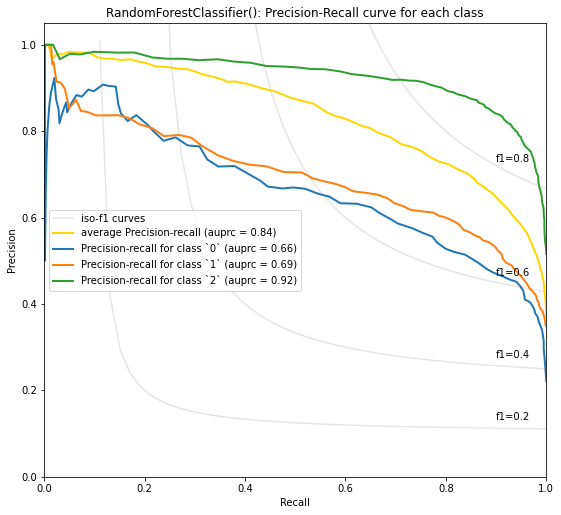

In [ ]:
random_forest_classifier.plot_precision_recall()

#### Random Forest Classifier With Balanced Dataset

```
Testing the Model With Balanced Dataset to see if we can improve the model.
```

In [ ]:
df_valence_balanced = balance_dataset_based_on_categories(df_valence, 
                                        target_column="valence", 
                                        category_values=[
                                            "positive",
                                            "negative",
                                            "neutral"
                                        ])

In [ ]:
df_valence_balanced.valence.value_counts()

negative    2901
neutral     2901
positive    2901
Name: valence, dtype: int64

In [ ]:
random_forest_classifier_B = Model(
    model_name="classifier",
    input_data=list(df_valence_balanced.babbage_similarity.values),
    output=df_valence_balanced.valence_code,
    labels=list(df_valence_balanced.valence.cat.codes.unique())
)

In [ ]:
random_forest_classifier_B.split_data(test_size=0.2)

In [ ]:
random_forest_classifier_B.train(n_estimators=100)

CLASSIFIER Model Training Done after 69.91 sec


In [ ]:
random_forest_classifier_B.predict()

In [ ]:
print(random_forest_classifier_B.report())

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       593
           1       0.66      0.55      0.60       572
           2       0.81      0.89      0.85       576

    accuracy                           0.75      1741
   macro avg       0.74      0.75      0.74      1741
weighted avg       0.74      0.75      0.74      1741



RandomForestClassifier() - Average precision score over all classes: 0.23


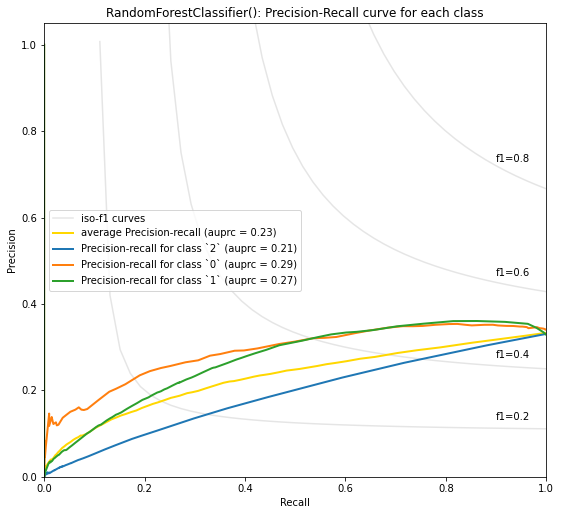

In [ ]:
random_forest_classifier_B.plot_precision_recall()

#### Support Vector Machine

In [ ]:
support_vector_machine = Model(
    model_name="svc",
    input_data=list(df_valence.babbage_similarity.values),
    output=df_valence.valence_code,
    labels=list(df_valence.valence.cat.codes.unique())
)

In [ ]:
support_vector_machine.split_data(test_size=0.2)

In [ ]:
support_vector_machine.train(probability=True)

SVC Model Training Done after 1917.16 sec


In [ ]:
support_vector_machine.predict()

In [ ]:
print(support_vector_machine.report())

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       588
           1       0.69      0.69      0.69      1282
           2       0.86      0.91      0.88      1841

    accuracy                           0.78      3711
   macro avg       0.75      0.73      0.74      3711
weighted avg       0.78      0.78      0.78      3711



SVC(C=1, kernel='linear', probability=True) - Average precision score over all classes: 0.88


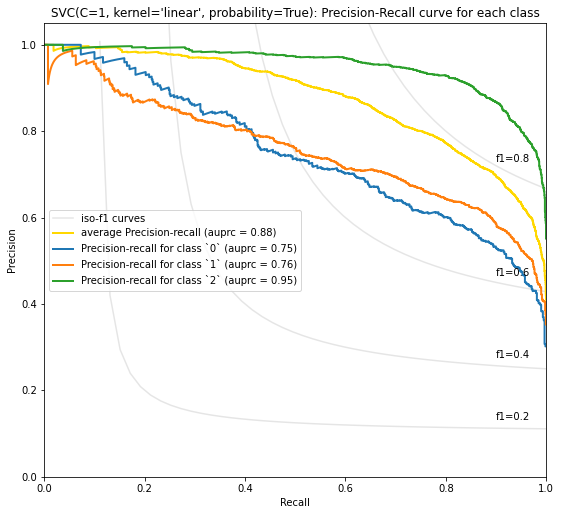

In [ ]:
support_vector_machine.plot_precision_recall()

In [ ]:
support_vector_machine.save_model(f"{BASE_PATH}/valence_svc_classifier.sav")



```
We use SVM because of the Best Accuracy & Precision-Recall Matrix.
```



### Arousal Modelling

In [ ]:
df_arousal = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_arousal_w_embeddings.csv",
                                          transform_columns=False,
                                          cleanse_dataset=False)

In [ ]:
df_arousal.head()

,review_header,review_text,arousal,combined,babbage_similarity
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",low,"Title: Stinky, sloppy cut hose.; Content: It w...","[0.00666764285415411, 0.022180898115038872, -0..."
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,high,Title: SMELLS awful; Content: has that horribl...,"[0.002960040932521224, 0.011734704487025738, -..."
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,low,Title: Terrible Rubber Smell; Content: Thought...,"[0.02114497497677803, 0.016543280333280563, -0..."
3,"Knock Knock, broken",After 1 month it falls apart,low,"Title: Knock Knock, broken; Content: After 1 m...","[0.006736414507031441, 0.015398834832012653, -..."
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,high,Title: Smelled like burning rubber; Content: L...,"[0.012572546489536762, 0.021474963054060936, 0..."


In [ ]:
df_arousal.shape

(19705, 5)

In [ ]:
df_arousal["babbage_similarity"] = df_arousal.babbage_similarity.apply(eval).apply(np.array)

In [ ]:
df_arousal.arousal.value_counts()

high       14193
low         5385
neutral      127
Name: arousal, dtype: int64

In [ ]:
df_arousal["arousal"] = pd.Categorical(df_arousal.arousal)

In [ ]:
dict(enumerate(df_arousal.arousal.cat.categories))

{0: 'high', 1: 'low', 2: 'neutral'}

In [ ]:
df_arousal['arousal_code'] = df_arousal.arousal.cat.codes

In [ ]:
df_arousal.head()

,review_header,review_text,arousal,combined,babbage_similarity,arousal_code
0,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",low,"Title: Stinky, sloppy cut hose.; Content: It w...","[0.00666764285415411, 0.022180898115038872, -0...",1
1,SMELLS awful,has that horrible harbor freight VOC smell.. f...,high,Title: SMELLS awful; Content: has that horribl...,"[0.002960040932521224, 0.011734704487025738, -...",0
2,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,low,Title: Terrible Rubber Smell; Content: Thought...,"[0.02114497497677803, 0.016543280333280563, -0...",1
3,"Knock Knock, broken",After 1 month it falls apart,low,"Title: Knock Knock, broken; Content: After 1 m...","[0.006736414507031441, 0.015398834832012653, -...",1
4,Smelled like burning rubber,Looks great but stunk up my entire house even ...,high,Title: Smelled like burning rubber; Content: L...,"[0.012572546489536762, 0.021474963054060936, 0...",0


#### Random Forest Classifier

In [ ]:
random_forest_classifier = Model(
    model_name="classifier",
    input_data=list(df_arousal.babbage_similarity.values),
    output=df_arousal.arousal_code,
    labels=list(df_arousal.arousal.cat.codes.unique())
)

In [ ]:
random_forest_classifier.split_data(test_size=0.2)

In [ ]:
random_forest_classifier.train(n_estimators=100)

CLASSIFIER Model Training Done after 373.48 sec


In [ ]:
random_forest_classifier.predict()

In [ ]:
print(random_forest_classifier.report())

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2834
           1       0.70      0.61      0.65      1074
           2       0.00      0.00      0.00        33

    accuracy                           0.81      3941
   macro avg       0.52      0.50      0.51      3941
weighted avg       0.80      0.81      0.81      3941



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier() - Average precision score over all classes: 0.31


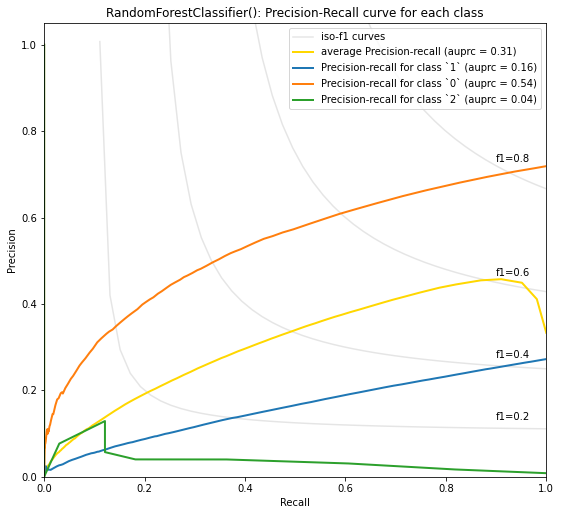

In [ ]:
random_forest_classifier.plot_precision_recall()

#### Random Forest Classifier With Balanced Dataset

In [ ]:
df_arousal_balanced = balance_dataset_based_on_categories(df_arousal, 
                                        target_column="arousal", 
                                        category_values=[
                                            "high",
                                            "low",
                                            "neutral"
                                        ])

In [ ]:
df_arousal_balanced.arousal.value_counts()

high       127
low        127
neutral    127
Name: arousal, dtype: int64

In [ ]:
random_forest_classifier_B = Model(
    model_name="classifier",
    input_data=list(df_arousal_balanced.babbage_similarity.values),
    output=df_arousal_balanced.arousal_code,
    labels=list(df_arousal_balanced.arousal.cat.codes.unique())
)

In [ ]:
random_forest_classifier_B.split_data(test_size=0.2)

In [ ]:
random_forest_classifier_B.train(n_estimators=100)

CLASSIFIER Model Training Done after 1.05 sec


In [ ]:
random_forest_classifier_B.predict()

In [ ]:
print(random_forest_classifier_B.report())

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        34
           1       0.58      0.86      0.69        21
           2       1.00      0.95      0.98        22

    accuracy                           0.79        77
   macro avg       0.82      0.82      0.80        77
weighted avg       0.83      0.79      0.80        77



RandomForestClassifier() - Average precision score over all classes: 0.90


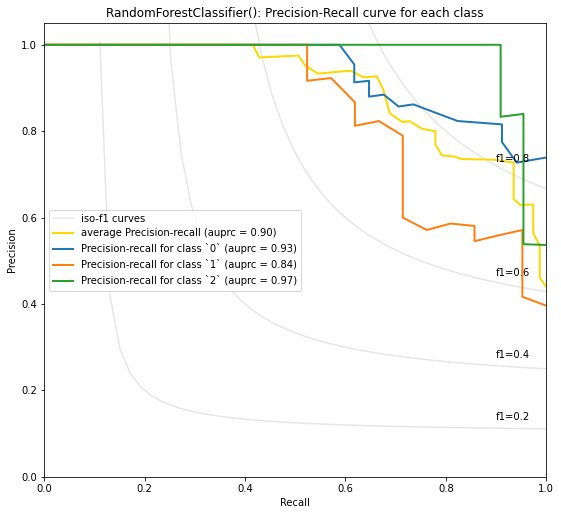

In [ ]:
random_forest_classifier_B.plot_precision_recall()

#### Support Vector Machine

In [ ]:
support_vector_machine = Model(
    model_name="svc",
    input_data=list(df_arousal.babbage_similarity.values),
    output=df_arousal.arousal_code,
    labels=list(df_arousal.arousal.cat.codes.unique())
)

In [ ]:
support_vector_machine.split_data(test_size=0.2)

In [ ]:
support_vector_machine.train(probability=True)

SVC Model Training Done after 2691.13 sec


In [ ]:
support_vector_machine.predict()

In [ ]:
print(support_vector_machine.report())

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2834
           1       0.70      0.69      0.70      1074
           2       0.00      0.00      0.00        33

    accuracy                           0.83      3941
   macro avg       0.53      0.53      0.53      3941
weighted avg       0.82      0.83      0.83      3941



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(C=1, kernel='linear', probability=True) - Average precision score over all classes: 0.31


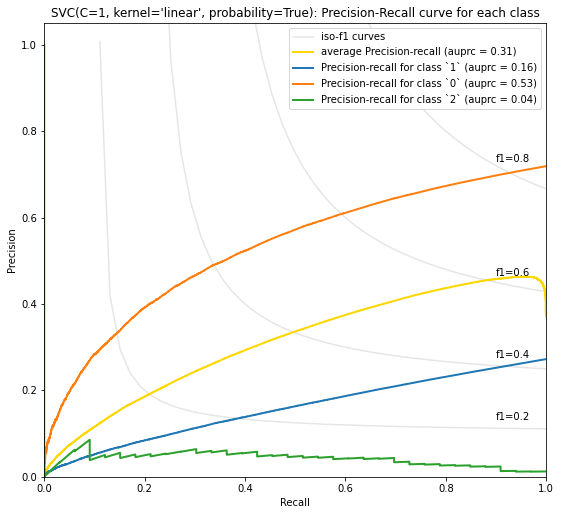

In [ ]:
support_vector_machine.plot_precision_recall()

In [ ]:
support_vector_machine.save_model(f"{BASE_PATH}/arousal_svc_classifier.sav")

```
We choose SVM based on best accuracy and because of the reason that it was trained on larger dataset 
And it is more reliable then Balance Random Forest's because that has only 127 samples.
```

# Combining Context Clustering with Valence & Arousal 
---

**Author: Usama Shahid**


```
1: Read dataset with embeddings
2: Pick a brand/service/product reviews
3: Classify Valence & Arousal 
4: Make quadrant groups based on Valence & Arousal
5: Performing Clustering for each quadrant
6: Explaining each cluster using samples with help of GPT3's davinci (Prompt Engineering)
```

## Common Functions

In [8]:
def get_reduced_embeddings_dimensions(matrix, dimensions=2, **kwargs):
    """
    This function use TSNE algorithm to convert our embeddings dimensions to given ones.

    :param matrix: dimensions matrix
    :param dimensions: no. of expcted dimensions
    :param kwargs:
    :return: 2-D array
    """
  try:
    tsne = TSNE(n_components=dimensions, perplexity=15, random_state=42, init='random', learning_rate=200, **kwargs)
    vis_dims = tsne.fit_transform(matrix)
    return vis_dims
  except Exception as e:
    print(f"Error(reduce_embeddings_dimensions): {e}")

In [9]:
def fast_cluster_reviews(embeddings, 
                    min_cluster_size:int=25, 
                    probability:float=0.75):
    """
    This function cluster our reviews using embeddings ang given parameters

    :param embeddings:
    :param min_cluster_size:
    :param probability:
    :return: list of clusters
    """
  try:
    return util.community_detection(torch.FloatTensor(embeddings.to_list()), 
                                    min_community_size=min_cluster_size, 
                                    threshold=probability)
  except Exception as e:
    print(f"Error(cluster_reviews): {e}")

In [222]:
def print_fast_clustered_reviews(df_reviews, clusters):
    """
    This functions prints our cluster in an organized format.
    
    :param df_reviews:
    :param clusters:
    :return:
    """
  for i, cluster in enumerate(clusters):
    if len(cluster) > 0:
      print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
      for sentence_id in random.sample(cluster, 3):
          print("\t", 
                "REVIEW HEADER: ", df_reviews.iloc[sentence_id]["review_header"], 
                "| REVIEW TEXT: ", df_reviews.iloc[sentence_id]["review_text"][:70])

In [238]:
def map_quadrant_clusters_to_df(df, all_quadrant_clusters, combinations):
    """
    This function maps our cluster lists to dataframes to enable data manipulation and analysis
    :param df:
    :param all_quadrant_clusters: list of all quadrants and their respective clusters
    :param combinations: quadrant combinations
    :return: list of dataframes of quadrants
    """

  df['cluster'] = -1
  df['quadrant'] = -1
  dataframes = []
  
  for c, combination in enumerate(combinations):
    t_df = df.loc[(df.arousal == combination[0]) & (df.valence == combination[1])]

    for j, cluster in enumerate(all_quadrant_clusters[c]):
      for sentence_id in cluster:
        t_df['quadrant'].iloc[sentence_id] = c
        t_df['cluster'].iloc[sentence_id] = j
    
    t_df = t_df.loc[(t_df.quadrant > -1) & (t_df.cluster > -1)]
    if len(t_df) > 0:
      dataframes.append(t_df)

  return dataframes

In [97]:
def get_random_colors(n=3):
    """
    This module generates N number of random colors
    :param n:
    :return: list of N colors
    """
  colrs = []
  for i in range(n):
    while True:
      color = "#"+ ''.join([random.choice('ABCDEF0123456789') for i in range(6)])
      if color not in colrs:
        colrs.append(color)
        break

  return colrs

In [274]:
def plot_embeddings(df_reviews,
                    vis_dims, 
                    title: str = ""):
    """
    This module visualizes the embeddings
    
    :param df_reviews:
    :param vis_dims:
    :param title:
    :return:
    """
  try:
    x = [x for x, y in vis_dims]
    y = [y for x, y in vis_dims]

    colors = get_random_colors(len(df_reviews.cluster.unique()))
    color_indices = df_reviews.cluster.values
    colormap = matplotlib.colors.ListedColormap(colors)
    plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.7)

    plt.title(title)
    plt.show()
  except Exception as e:
    print(f"Error(plot_embeddings): {e}")

In [102]:
def print_reviews_from_combinations(df, combinations, reviews_per_cluster=3):
    """
    This module prints the reviews by filtering based on quadrant combinations

    :param df:
    :param combinations: quadrants combiantions
    :param reviews_per_cluster:
    :return:
    """
  for combination in combinations:
    t_df = df.loc[(df.arousal == combination[0]) & (df.valence == combination[1])]
    sample_combination_rows = t_df.sample(n=reviews_per_cluster)
    print(f"Arousal: {combination[0]}\tValence: {combination[1]}\tNumber of Reviews: {combinations[combination]}")
    print("*" * 100)
    
    for i in range(reviews_per_cluster):
      print("Review Heading: ", sample_combination_rows.review_header.values[i])
      print("Review Text: ", sample_combination_rows.review_text.str[:70].values[i])
      print("Review Rating: ", sample_combination_rows.rating.values[i])
      print("-" * 100)

    print("\n\n")
    print("*" * 100)

In [167]:
def make_clusters_for_each_combination(df, 
                                        combinations, 
                                        min_cluster_size: int=25, 
                                        probability:float=0.75):
    """
    This module perfomrs clustering for each quadrant combinations

    :param df:
    :param combinations:
    :param min_cluster_size:
    :param probability:
    :return: all quadrants clusters
    """
  clusters_group = []

  for combination in combinations:
    t_df = df.loc[(df.arousal == combination[0]) & (df.valence == combination[1])]
    print(dict(t_df[["arousal", "valence"]].value_counts()))
    clusters = fast_cluster_reviews(t_df.babbage_similarity, 
                                    min_cluster_size,
                                    probability)
    clusters_group.append(clusters)
  
  return clusters_group

In [15]:
def predict_valence_and_label(df):
    """
    This module uses the trained models to predict and label Valence & Arousal
    :param df:
    :return: Valence & Arousal labeled dataframe
    """
  VALENCE_MODEL = f"{BASE_PATH}/valence_svc_classifier.sav"
  AROUSAL_MODEL = f"{BASE_PATH}/arousal_svc_classifier.sav"

  arousal_labels = {0: 'high', 1: 'low', 2: 'neutral'}
  valence_labels = {0: 'negative', 1: 'neutral', 2: 'positive'}

  arousal_model = Model(is_model_loading=True)
  arousal_model.load_model(AROUSAL_MODEL)
  df["arousal_code"] = arousal_model.predict(list(df.babbage_similarity.values))
  df["arousal"] = df.arousal_code.apply(lambda x: arousal_labels[x])

  valence_model = Model(is_model_loading=True)
  valence_model.load_model(VALENCE_MODEL)
  df["valence_code"] = valence_model.predict(list(df.babbage_similarity.values))
  df["valence"] = df.valence_code.apply(lambda x: valence_labels[x])

  return df

In [16]:
def get_brand_emotion_analysis(df, brand="INEVIFIT"):
    """
    This function converts embdgings from str to right format and intiates labelling of rows
    :param df:
    :param brand:
    :return:
    """
  df = df.loc[df["brand"] == brand]

  print("Converting Embeddings !")
  df["babbage_similarity"] = df.babbage_similarity.apply(eval).apply(np.array)

  print("Predicting Labels for Valence & Arousal !")
  df = predict_valence_and_label(df)

  return df 

## Execution

```
For each selected brand:
  1: Get Valence & Arousal Combination labels via trained models
  2: Analyze Valence & Arousal Quadrants/Combinations
  3: Cluster each quadrants reviews
  4: View and Plot Clusters/Reviews
```

In [17]:
df = read_and_preprocess_dataset(f"{BASE_PATH}/chunk_2_Openai_babbage_embeddings.csv",
                                          transform_columns=False,
                                          cleanse_dataset=False)

In [18]:
df.head()

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,is_verified,badge,reviews_count,brand,asin,warning,combined,n_tokens,babbage_similarity,is_labeled
0,R176WUN6YB5Y2J,"Stinky, sloppy cut hose.","It was cheap, but I guess you get what you it ...",Sean R.,B07BDK71TR,/gp/profile/amzn1.account.AECDNJOXBR3WUFPOXLPI...,AECDNJOXBR3WUFPOXLPIJRD7ZY6Q,1.0,"March 19, 2021",2021-03-19T00:00:00.000Z,1.0,Verified Purchase,8.0,Apexstone,B07BDK71TR,NaN,"Title: Stinky, sloppy cut hose.; Content: It w...",78.0,"[0.00666764285415411, 0.022180898115038872, -0...",NaN
1,RWSJHY80TLLZW,SMELLS awful,has that horrible harbor freight VOC smell.. f...,Mr.E_Shopper,B07BDK71TR,/gp/profile/amzn1.account.AHNH2NHWL2FGSYIWLZTP...,AHNH2NHWL2FGSYIWLZTPNYCAHENA,1.0,"May 16, 2020",2020-05-16T00:00:00.000Z,1.0,Verified Purchase,8.0,Apexstone,B07BDK71TR,NaN,Title: SMELLS awful; Content: has that horribl...,34.0,"[0.002960040932521224, 0.011734704487025738, -...",NaN
2,R2NPVTFY0ZRCK9,Terrible Rubber Smell,Thought the smell issue got resolved per some ...,etcg20,B07BDK71TR,/gp/profile/amzn1.account.AE5L7OI75KDRB5BRG7B4...,AE5L7OI75KDRB5BRG7B4TYJE5CSQ,1.0,"August 25, 2021",2021-08-25T00:00:00.000Z,1.0,Verified Purchase,8.0,Apexstone,B07BDK71TR,NaN,Title: Terrible Rubber Smell; Content: Thought...,53.0,"[0.02114497497677803, 0.016543280333280563, -0...",NaN
3,RURFK88JSDXAD,"Knock Knock, broken",After 1 month it falls apart,Vince,B07BDK71TR,/gp/profile/amzn1.account.AGSIVOWFDVAFN7PYH446...,AGSIVOWFDVAFN7PYH4464S66HR3A,1.0,"May 6, 2020",2020-05-06T00:00:00.000Z,1.0,Verified Purchase,8.0,Apexstone,B07BDK71TR,NaN,"Title: Knock Knock, broken; Content: After 1 m...",15.0,"[0.006736414507031441, 0.015398834832012653, -...",NaN
4,R28R3CJZSSCRM7,Smelled like burning rubber,Looks great but stunk up my entire house even ...,mark,B07BDK71TR,/gp/profile/amzn1.account.AGHMALK53BLUIZVOSEPT...,AGHMALK53BLUIZVOSEPTCD6X44RQ,1.0,"November 8, 2021",2021-11-08T00:00:00.000Z,1.0,Verified Purchase,8.0,Apexstone,B07BDK71TR,NaN,Title: Smelled like burning rubber; Content: L...,29.0,"[0.012572546489536762, 0.021474963054060936, 0...",NaN


In [19]:
# Checking which brands has the highest No. of reviews
highest_review_brands = dict(df["brand"].value_counts().head())

In [20]:
highest_review_brands

{'INEVIFIT': 1353,
 'RFAQK': 1325,
 'KEVENZ': 1078,
 'HERTZKO': 1051,
 'Homdox': 959}

```
Analysing all the brands below:

1: INEVIFIT
2: RFAQK
3: KEVENZ
4: HERTZKO
5: Homdox

The code is module oriented to ensure re-usability and easibility while making analysis for different brands.
```

### **INEVIFIT BRAND ANALYSIS**


In [255]:
# Filtering the dataset based on Brand & Labelling Valence + Arousal using trained models
df_brand = get_brand_emotion_analysis(df, "INEVIFIT")

Converting Embeddings !


<ipython-input-16-41113d35dd0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["babbage_similarity"] = df.babbage_similarity.apply(eval).apply(np.array)


Predicting Labels for Valence & Arousal !


<ipython-input-15-cdf840105ab8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["arousal_code"] = arousal_model.predict(list(df.babbage_similarity.values))
<ipython-input-15-cdf840105ab8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["arousal"] = df.arousal_code.apply(lambda x: arousal_labels[x])
<ipython-input-15-cdf840105ab8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [256]:
df_brand.head()

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,...,asin,warning,combined,n_tokens,babbage_similarity,is_labeled,arousal_code,arousal,valence_code,valence
22379,RWIF056EPIFEL,"Poor performance, inaccurate scale",This product has questionable performance. 1. ...,Tamara Case,B07S7FWMC7,/gp/profile/amzn1.account.AETHYKDMXID47WHEAZKK...,AETHYKDMXID47WHEAZKK2E7LY4TA,1.0,"February 4, 2021",2021-02-04T00:00:00.000Z,...,B07S7FWMC7,NaN,"Title: Poor performance, inaccurate scale; Con...",149.0,"[0.007566590793430805, 0.009526317939162254, -...",NaN,1,low,0,negative
22380,RX9P048818W46,Not very accurate,"This scale is very nice looking however, withi...",Rhulsey1,B07S7FWMC7,/gp/profile/amzn1.account.AF4E2CVFZYQEIHF5SHXM...,AF4E2CVFZYQEIHF5SHXM5VHS3JNA,1.0,"May 7, 2020",2020-05-07T00:00:00.000Z,...,B07S7FWMC7,NaN,Title: Not very accurate; Content: This scale ...,78.0,"[0.007095840759575367, 0.0136205293238163, -0....",NaN,1,low,0,negative
22381,R1GUXIZDCCPKEK,Quit working in just over 30 days. Not sure if...,This scale quit working in just over 30 days -...,Lunacat,B07S7FWMC7,/gp/profile/amzn1.account.AH4B55DR5SKC2I6YJMMQ...,AH4B55DR5SKC2I6YJMMQBB3G5JBA,1.0,"February 9, 2021",2021-02-09T00:00:00.000Z,...,B07S7FWMC7,NaN,Title: Quit working in just over 30 days. Not ...,144.0,"[-0.014531427063047886, 0.005813523195683956, ...",NaN,0,high,0,negative
22382,R1H7TL6SNIJWJH,This product sucks!,I bought this thinking that it would be a grea...,Brannin Tyler,B07S7FWMC7,/gp/profile/amzn1.account.AFRGNFOXZI3GJBAY5LMH...,AFRGNFOXZI3GJBAY5LMHNALUOXDA,1.0,"June 16, 2021",2021-06-16T00:00:00.000Z,...,B07S7FWMC7,NaN,Title: This product sucks!; Content: I bought ...,138.0,"[0.0030781205277889967, 0.02054044045507908, -...",NaN,1,low,0,negative
22383,R2FP1A56AP5HR4,Garbage Bluetooth and sync,I can’t really state anything about the accura...,Patrick J Lawson,B07S7FWMC7,/gp/profile/amzn1.account.AHUX7GBM6WAGDCZ3TESO...,AHUX7GBM6WAGDCZ3TESOZVU7FJPA,1.0,"July 4, 2021",2021-07-04T00:00:00.000Z,...,B07S7FWMC7,NaN,Title: Garbage Bluetooth and sync; Content: I ...,92.0,"[0.005020540207624435, 0.023386821150779724, -...",NaN,1,low,0,negative


In [257]:
df_brand.shape

(1353, 24)

```
Each combination, i.e. (high, positive) represents a quadrant. 
The keys and their count reflect on the detail of how the brand is doing.

For example: Having quadrant (('high', 'positive')) with highest count:
Means most of the people are talking about product with happiness and excitement and so on.
```

In [258]:
# All possible combinations/quadrants with their to understand user emotions shape
all_emotion_combinations = dict(df_brand[["arousal", "valence"]].value_counts())
all_emotion_combinations

{('high', 'positive'): 670,
 ('high', 'neutral'): 277,
 ('low', 'negative'): 255,
 ('low', 'neutral'): 114,
 ('high', 'negative'): 37}

In [259]:
# Printing reviews in each quadrant to understand user's concerns and check for relevancy/quality
print("Analysis of each Valence & Arousal Combination Quadrants:\n\n")
print_reviews_from_combinations(df_brand, all_emotion_combinations)

Analysis of each Valence & Arousal Combination Quadrants:


Arousal: high	Valence: positive	Number of Reviews: 670
****************************************************************************************************
Review Heading:  Best containers I have found
Review Text:  These are top of line, they are a nice size, they fit inside fridge ni
Review Rating:  5.0
----------------------------------------------------------------------------------------------------
Review Heading:  Bathroom Scale
Review Text:  Attractive design & accuracy
Review Rating:  4.0
----------------------------------------------------------------------------------------------------
Review Heading:  Great quality product at a good price.
Review Text:  I compared several models of similar scales, and found that this appea
Review Rating:  5.0
----------------------------------------------------------------------------------------------------



***********************************************************************

In [268]:
# Making clusters in each Quadrant/Combinations, i.e. (high, positive)
all_quadrant_clusters = make_clusters_for_each_combination(df_brand, 
                                                            all_emotion_combinations,
                                                            10, 0.85)

{('high', 'positive'): 670}
{('high', 'neutral'): 277}
{('low', 'negative'): 255}
{('low', 'neutral'): 114}
{('high', 'negative'): 37}


In [269]:
len(all_quadrant_clusters)

5

In [270]:
# Visualsing sample of reviews from the clusters formed in each Quadrant
for i, comb in enumerate(all_emotion_combinations):
  if len(all_quadrant_clusters[i]) > 0:
    print(f"Arousal: {comb[0]}\tValence: {comb[1]}\tTotal Clusters: {len(all_quadrant_clusters[i])}")
    print_fast_clustered_reviews(df_brand, all_quadrant_clusters[i])

    print("*" * 100)
    print("\n\n")

Arousal: high	Valence: positive	Total Clusters: 9

Cluster 1, #342 Elements 
	 REVIEW HEADER:  Great scale, accurate | REVIEW TEXT:  This is the best scale I've purchased. I was worried about it getting 
	 REVIEW HEADER:  Terrible | REVIEW TEXT:  It worked for a while. Waste of time aza nd money. Very disappointed i
	 REVIEW HEADER:  comes with bad batteries | REVIEW TEXT:  the scale came with leaking (old) batteries

Cluster 2, #51 Elements 
	 REVIEW HEADER:  AWFUL CUSTOMER SERVICE!! DOES NOT CONNECT WITH APP. | REVIEW TEXT:  I thought this was going to be great but it does not work. I set it up
	 REVIEW HEADER:  Love it everyone should have one | REVIEW TEXT:  Easy to use on point and tell you where you stand on your fitness trai
	 REVIEW HEADER:  Lots of benefits | REVIEW TEXT:  I love this product. However theres no way i only have 13% body fat. I

Cluster 3, #28 Elements 
	 REVIEW HEADER:  Great but it eats batteries | REVIEW TEXT:  When the scale is powered up with new batteries 

In [271]:
# Mapping all the cluster indexs onto dataframe format for further manipulation
df_brand_quads = map_quadrant_clusters_to_df(df_brand, all_quadrant_clusters, all_emotion_combinations)

<ipython-input-238-4ccb44008231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = -1
<ipython-input-238-4ccb44008231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quadrant'] = -1
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

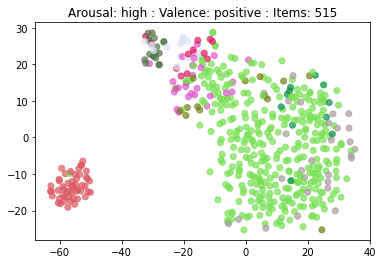

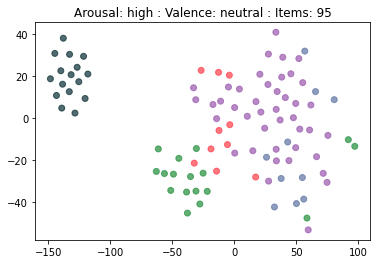

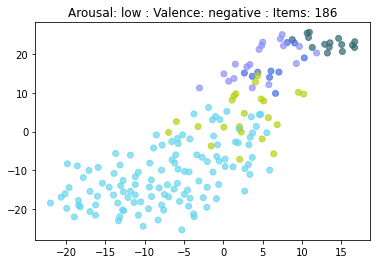

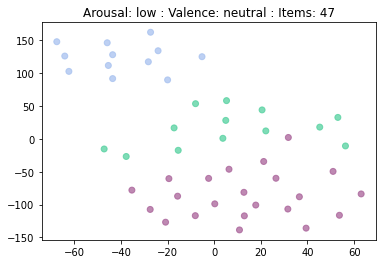

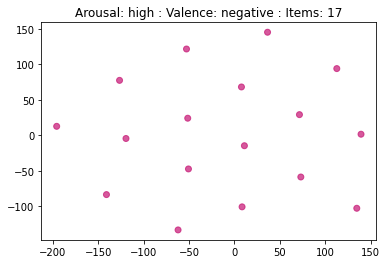

In [275]:
# Visualising clusters formed in each Quadrant
for df_sample in df_brand_quads:
  title = f"Arousal: {df_sample.iloc[0]['arousal']}"
  title += f" : Valence: {df_sample.iloc[0]['valence']}"
  title += f" : Items: {len(df_sample)}"
  
  dimensions_2d = get_reduced_embeddings_dimensions(df_sample.babbage_similarity.to_list())
  plot_embeddings(df_sample, dimensions_2d, title=title)
  print("\n\n")

### **RFAQK BRAND ANALYSIS**


In [280]:
# Filtering the dataset based on Brand & Labelling Valence + Arousal using trained models
df_brand = get_brand_emotion_analysis(df, "RFAQK")

Converting Embeddings !
Predicting Labels for Valence & Arousal !


In [281]:
df_brand.head()

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,...,asin,warning,combined,n_tokens,babbage_similarity,is_labeled,arousal_code,arousal,valence_code,valence
11962,RTDNP8J4ANWG9,HORRIBLE!! Lids Don’t go on and white stuff in...,Horrible!! I’m sorry but we have been using th...,Mary Bradley,B08253P11X,/gp/profile/amzn1.account.AHC75VP4H7POYE55S73H...,AHC75VP4H7POYE55S73HFHHMU3OQ,1.0,"July 30, 2020",2020-07-30T00:00:00.000Z,...,B08253P11X,NaN,Title: HORRIBLE!! Lids Don’t go on and white s...,145.0,"[0.007982787676155567, 0.009524226188659668, 0...",NaN,1,low,0,negative
11963,R2511X2Y75D1ZI,I cannot snap the lids on!!!,I've let my son and daughter try to snap the l...,FC,B08253P11X,/gp/profile/amzn1.account.AHIPIX7MX7LVSY2JOJQK...,AHIPIX7MX7LVSY2JOJQK42W3IJPQ,1.0,"September 17, 2020",2020-09-17T00:00:00.000Z,...,B08253P11X,NaN,Title: I cannot snap the lids on!!!; Content: ...,119.0,"[0.009297116659581661, -0.00355562218464911, -...",NaN,1,low,0,negative
11964,R9N50VEO61J1,Lids could be better,The lids are a struggle to get aligned and sna...,Joanna,B08253P11X,/gp/profile/amzn1.account.AGWJ3JIFB6WKXI5NGQ7N...,AGWJ3JIFB6WKXI5NGQ7NLJDBEXVQ,1.0,"February 14, 2021",2021-02-14T00:00:00.000Z,...,B08253P11X,NaN,Title: Lids could be better; Content: The lids...,28.0,"[0.006863369140774012, 0.012518036179244518, 0...",NaN,0,high,1,neutral
11965,R12XCFHDXVBLB5,Going to return,The lids are very difficult to snap and soups ...,Ps redhead,B08253P11X,/gp/profile/amzn1.account.AFEG6YEN2YR756O6X5PT...,AFEG6YEN2YR756O6X5PTKNWDNW3Q,1.0,"November 10, 2021",2021-11-10T00:00:00.000Z,...,B08253P11X,NaN,Title: Going to return; Content: The lids are ...,30.0,"[0.0017147980397567153, 0.006095544435083866, ...",NaN,1,low,0,negative
11966,R2D0U8M5UOJX59,NOT DISHWASHER SAFE,These containers are NOT worth the money. Too ...,Mary Ann McDermott,B08253P11X,/gp/profile/amzn1.account.AFMUUGBYGAG7PJ6NLPGZ...,AFMUUGBYGAG7PJ6NLPGZCJQMX6KQ,1.0,"August 29, 2021",2021-08-29T00:00:00.000Z,...,B08253P11X,NaN,Title: NOT DISHWASHER SAFE; Content: These con...,67.0,"[0.0052993567660450935, 0.013890299946069717, ...",NaN,1,low,0,negative


In [282]:
df_brand.shape

(1325, 24)

```
Each combination, i.e. (high, positive) represents a quadrant. 
The keys and their count reflect on the detail of how the brand is doing.

For example: Having quadrant (('high', 'positive')) with highest count:
Means most of the people are talking about product with happiness and excitement and so on.
```

In [283]:
# All possible combinations/quadrants with their to understand user emotions shape
all_emotion_combinations = dict(df_brand[["arousal", "valence"]].value_counts())
all_emotion_combinations

{('high', 'positive'): 582,
 ('high', 'neutral'): 343,
 ('low', 'negative'): 191,
 ('low', 'neutral'): 182,
 ('high', 'negative'): 27}

In [284]:
# Printing reviews in each quadrant to understand user's concerns and check for relevancy/quality
print("Analysis of each Valence & Arousal Combination Quadrants:\n\n")
print_reviews_from_combinations(df_brand, all_emotion_combinations)

Analysis of each Valence & Arousal Combination Quadrants:


Arousal: high	Valence: positive	Number of Reviews: 582
****************************************************************************************************
Review Heading:  Awesome
Review Text:  I am on love with this set. I appreciate the picture guide letting me 
Review Rating:  5.0
----------------------------------------------------------------------------------------------------
Review Heading:  Thank You
Review Text:  I had a problem with my order, but the problem was resolved. WONDERFUL
Review Rating:  4.0
----------------------------------------------------------------------------------------------------
Review Heading:  Good quality product
Review Text:  Great & Complete Russian piping tips set. Loved it. Numbered tips are 
Review Rating:  5.0
----------------------------------------------------------------------------------------------------



*************************************************************************

In [285]:
# Making clusters in each Quadrant/Combinations, i.e. (high, positive)
all_quadrant_clusters = make_clusters_for_each_combination(df_brand, 
                                                            all_emotion_combinations,
                                                            10, 0.85)

{('high', 'positive'): 582}
{('high', 'neutral'): 343}
{('low', 'negative'): 191}
{('low', 'neutral'): 182}
{('high', 'negative'): 27}


In [286]:
len(all_quadrant_clusters)

5

In [287]:
# Visualsing sample of reviews from the clusters formed in each Quadrant
for i, comb in enumerate(all_emotion_combinations):
  if len(all_quadrant_clusters[i]) > 0:
    print(f"Arousal: {comb[0]}\tValence: {comb[1]}\tTotal Clusters: {len(all_quadrant_clusters[i])}")
    print_fast_clustered_reviews(df_brand, all_quadrant_clusters[i])

    print("*" * 100)
    print("\n\n")

Arousal: high	Valence: positive	Total Clusters: 10

Cluster 1, #151 Elements 
	 REVIEW HEADER:  Love these | REVIEW TEXT:  These are not as hard as everyone says!! I decorate cup cakes everyday
	 REVIEW HEADER:  Worth the money. | REVIEW TEXT:  Loved this kit but I ended up throwing out the cake cutter. The wire w
	 REVIEW HEADER:  Easy to store, love these container | REVIEW TEXT:  These containers are absolutely awesome they're easy to store they fit

Cluster 2, #40 Elements 
	 REVIEW HEADER:  missing items | REVIEW TEXT:  ad says it comes with pattern chart and an E-book-----haven't received
	 REVIEW HEADER:  Very small tips not for big decorations | REVIEW TEXT:  This kit would should be described as small decorations cake. The tips
	 REVIEW HEADER:  Good supplies | REVIEW TEXT:  I recommend these supplies for beginners who are still learning

Cluster 3, #34 Elements 
	 REVIEW HEADER:  Bought on sale and wow | REVIEW TEXT:  I enjoy baking. Recently found some new organic cake batte

In [288]:
# Mapping all the cluster indexs onto dataframe format for further manipulation
df_brand_quads = map_quadrant_clusters_to_df(df_brand, all_quadrant_clusters, all_emotion_combinations)

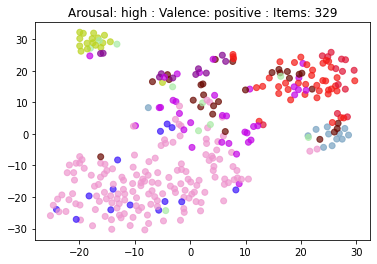

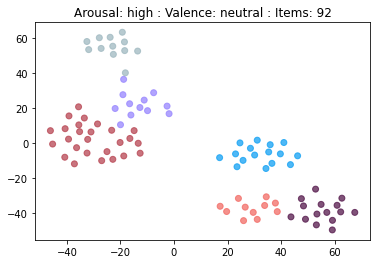

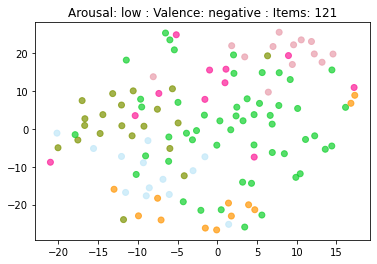

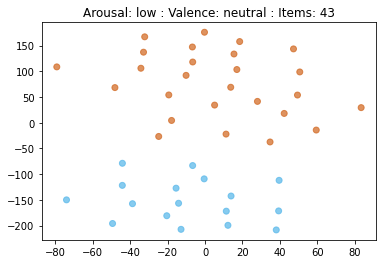

In [289]:
# Visualising clusters formed in each Quadrant
for df_sample in df_brand_quads:
  title = f"Arousal: {df_sample.iloc[0]['arousal']}"
  title += f" : Valence: {df_sample.iloc[0]['valence']}"
  title += f" : Items: {len(df_sample)}"
  
  dimensions_2d = get_reduced_embeddings_dimensions(df_sample.babbage_similarity.to_list())
  plot_embeddings(df_sample, dimensions_2d, title=title)
  print("\n\n")

### **KEVENZ BRAND ANALYSIS**


In [300]:
# Filtering the dataset based on Brand & Labelling Valence + Arousal using trained models
df_brand = get_brand_emotion_analysis(df, "KEVENZ")

Converting Embeddings !
Predicting Labels for Valence & Arousal !


In [301]:
df_brand.head()

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,...,asin,warning,combined,n_tokens,babbage_similarity,is_labeled,arousal_code,arousal,valence_code,valence
697,R2QRXFCIE3L9W9,"Different Quality Kevenz Balls? Try the ""Black...","These are practice balls, they are cheap. Do n...",Al_scv,B018JKE7F6,/gp/profile/amzn1.account.AETEJNQ2NJA7VTPOWTY4...,AETEJNQ2NJA7VTPOWTY45OLPGAXA,1.0,"June 9, 2018",2018-06-09T00:00:00.000Z,...,B018JKE7F6,NaN,Title: Different Quality Kevenz Balls? Try the...,329.0,"[0.014985071495175362, 0.0146512221544981, -0....",NaN,0,high,2,positive
698,R2TCCKUAIEJFRG,"not 3 star table tennis balls, not conforming ...",these balls are not what typically 3 star ball...,Paul Ricard,B018JKE7F6,/gp/profile/amzn1.account.AEHXIPBTYNS62ROD7PSJ...,AEHXIPBTYNS62ROD7PSJLRSENHMQ,1.0,"May 4, 2018",2018-05-04T00:00:00.000Z,...,B018JKE7F6,NaN,"Title: not 3 star table tennis balls, not conf...",98.0,"[0.008188465610146523, 0.005788064561784267, -...",NaN,1,low,1,neutral
699,R3V8489GBF2WZF,"Not the 3 Stars you want, here's WHY:",These are probably not the 3 Star quality ping...,BJ M.,B018JKE7F6,/gp/profile/amzn1.account.AFWBKWS2EE7UJS7NOYAV...,AFWBKWS2EE7UJS7NOYAVHLCDO75A,1.0,"August 21, 2020",2020-08-21T00:00:00.000Z,...,B018JKE7F6,NaN,"Title: Not the 3 Stars you want, here's WHY:; ...",156.0,"[0.00030336977215483785, 0.015181958675384521,...",NaN,1,low,0,negative
700,RQBVUZ8NJM3AO,New low quality product sold under old name an...,I was so happy with 50-pack I bought 2 years a...,Lola Kandel,B018JKE7F6,/gp/profile/amzn1.account.AGXMTCJUSYHRMWVUDFRQ...,AGXMTCJUSYHRMWVUDFRQG4IH4HTA,1.0,"October 17, 2020",2020-10-17T00:00:00.000Z,...,B018JKE7F6,NaN,Title: New low quality product sold under old ...,84.0,"[0.00907969381660223, 0.020947182551026344, -0...",NaN,1,low,1,neutral
701,RGIYSBC7904P6,Bad quality and service,The quality is bad and the balls are soft ; I ...,SEC,B018JKE7F6,/gp/profile/amzn1.account.AFEY4OXUGWQAI6EUYKSR...,AFEY4OXUGWQAI6EUYKSRICQVJNFA,1.0,"June 18, 2021",2021-06-18T00:00:00.000Z,...,B018JKE7F6,NaN,Title: Bad quality and service; Content: The q...,117.0,"[-0.0053611742332577705, 0.015855491161346436,...",NaN,1,low,0,negative


In [302]:
df_brand.shape

(1078, 24)

```
Each combination, i.e. (high, positive) represents a quadrant. 
The keys and their count reflect on the detail of how the brand is doing.

For example: Having quadrant (('high', 'positive')) with highest count:
Means most of the people are talking about product with happiness and excitement and so on.
```

In [303]:
# All possible combinations/quadrants with their to understand user emotions shape
all_emotion_combinations = dict(df_brand[["arousal", "valence"]].value_counts())
all_emotion_combinations

{('high', 'positive'): 483,
 ('high', 'neutral'): 239,
 ('low', 'negative'): 192,
 ('low', 'neutral'): 145,
 ('high', 'negative'): 19}

In [304]:
# Printing reviews in each quadrant to understand user's concerns and check for relevancy/quality
print("Analysis of each Valence & Arousal Combination Quadrants:\n\n")
print_reviews_from_combinations(df_brand, all_emotion_combinations)

Analysis of each Valence & Arousal Combination Quadrants:


Arousal: high	Valence: positive	Number of Reviews: 483
****************************************************************************************************
Review Heading:  Tough
Review Text:  This thing is pretty well built. The handle is comfortable. They give 
Review Rating:  5.0
----------------------------------------------------------------------------------------------------
Review Heading:  Goodvalue
Review Text:  Bought these for my dog, she loves them
Review Rating:  5.0
----------------------------------------------------------------------------------------------------
Review Heading:  Great ball for active dogs!
Review Text:  These are great tennis balls for my dogs who love to play fetch! They 
Review Rating:  5.0
----------------------------------------------------------------------------------------------------



***************************************************************************************************

In [305]:
# Making clusters in each Quadrant/Combinations, i.e. (high, positive)
all_quadrant_clusters = make_clusters_for_each_combination(df_brand, 
                                                            all_emotion_combinations,
                                                            10, 0.85)

{('high', 'positive'): 483}
{('high', 'neutral'): 239}
{('low', 'negative'): 192}
{('low', 'neutral'): 145}
{('high', 'negative'): 19}


In [306]:
len(all_quadrant_clusters)

5

In [307]:
# Visualsing sample of reviews from the clusters formed in each Quadrant
for i, comb in enumerate(all_emotion_combinations):
  if len(all_quadrant_clusters[i]) > 0:
    print(f"Arousal: {comb[0]}\tValence: {comb[1]}\tTotal Clusters: {len(all_quadrant_clusters[i])}")
    print_fast_clustered_reviews(df_brand, all_quadrant_clusters[i])

    print("*" * 100)
    print("\n\n")

Arousal: high	Valence: positive	Total Clusters: 11

Cluster 1, #72 Elements 
	 REVIEW HEADER:  These are NOT Ping Pong Balls | REVIEW TEXT:  They are BEER Pong Balls. They aren't supposed to be perfectly balance
	 REVIEW HEADER:  Speed is not good | REVIEW TEXT:  Me and my co player are not happy with the speed of this shuttlecock.
	 REVIEW HEADER:  Great purchase, do NOT hesitate!! | REVIEW TEXT:  Order came in today, quick 2-day shipping to my current military base.

Cluster 2, #51 Elements 
	 REVIEW HEADER:  Feathers Fray Quickly. Do Not Buy This. | REVIEW TEXT:  I bought this after looking at decent reviews on Amazon. But soon afte
	 REVIEW HEADER:  Exceeded expectations | REVIEW TEXT:  Very nice balls. Bounce well, and the powder coat or whatever they put
	 REVIEW HEADER:  These are balls for beginners only | REVIEW TEXT:  If you are practicing serves or just starting playing they are fine. I

Cluster 3, #40 Elements 
	 REVIEW HEADER:  These are ping pong balls? | REVIEW TEXT:  Fa

In [308]:
# Mapping all the cluster indexs onto dataframe format for further manipulation
df_brand_quads = map_quadrant_clusters_to_df(df_brand, all_quadrant_clusters, all_emotion_combinations)

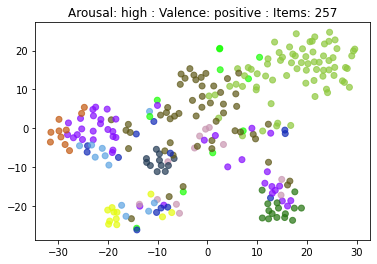

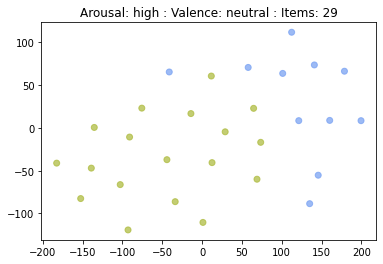

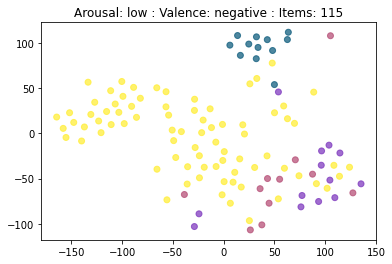

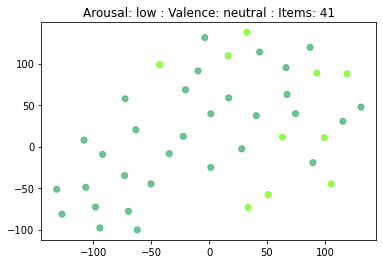

In [309]:
# Visualising clusters formed in each Quadrant
for df_sample in df_brand_quads:
  title = f"Arousal: {df_sample.iloc[0]['arousal']}"
  title += f" : Valence: {df_sample.iloc[0]['valence']}"
  title += f" : Items: {len(df_sample)}"
  
  dimensions_2d = get_reduced_embeddings_dimensions(df_sample.babbage_similarity.to_list())
  plot_embeddings(df_sample, dimensions_2d, title=title)
  print("\n\n")

### **HERTZKO BRAND ANALYSIS**


In [310]:
# Filtering the dataset based on Brand & Labelling Valence + Arousal using trained models
df_brand = get_brand_emotion_analysis(df, "HERTZKO")

Converting Embeddings !
Predicting Labels for Valence & Arousal !


In [311]:
df_brand.head()

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,...,asin,warning,combined,n_tokens,babbage_similarity,is_labeled,arousal_code,arousal,valence_code,valence
369,R2EKOKS63FCVQD,Fell apart within 3 months,Although it is easy to use and my dogs loved i...,Teia W,B07575941G,/gp/profile/amzn1.account.AEAQ76FCVJ7ZHRK7BF34...,AEAQ76FCVJ7ZHRK7BF342ADJSPLA,1.0,"April 10, 2019",2019-04-10T00:00:00.000Z,...,B07575941G,NaN,Title: Fell apart within 3 months; Content: Al...,92.0,"[-0.007341216783970594, -0.0008585654431954026...",NaN,1,low,0,negative
370,R3C1Z0SJ456FUW,Does Not Work on Shorthair Dogs,I bought this brush to help with the shedding ...,Tyler,B07575941G,/gp/profile/amzn1.account.AGBR4LCCLATKYW7M6XSE...,AGBR4LCCLATKYW7M6XSEAUVTOTLA,1.0,"January 31, 2019",2019-01-31T00:00:00.000Z,...,B07575941G,NaN,Title: Does Not Work on Shorthair Dogs; Conten...,80.0,"[-5.582550147664733e-05, 0.002084349747747183,...",NaN,1,low,0,negative
371,R12DWYH3RU0XAS,Doesn't get off any cat hair.,I have a cat who has sensitive skin and doesn'...,KTG,B07575941G,/gp/profile/amzn1.account.AGWJI7DGIPYF7QRXDZ3W...,AGWJI7DGIPYF7QRXDZ3W6GTQHP3Q,1.0,"February 20, 2021",2021-02-20T00:00:00.000Z,...,B07575941G,NaN,Title: Doesn't get off any cat hair.; Content:...,76.0,"[0.001667866948992014, 0.008791280910372734, 0...",NaN,1,low,1,neutral
372,R1GLSY90M4VOQX,Rubbish item.,I didn’t like anything. The bristles are too s...,Y. Thompa,B07575941G,/gp/profile/amzn1.account.AGZ2BLFTNWG7EACNRK26...,AGZ2BLFTNWG7EACNRK26UZC2B75A,1.0,"April 30, 2021",2021-04-30T00:00:00.000Z,...,B07575941G,NaN,Title: Rubbish item.; Content: I didn’t like a...,74.0,"[0.002587070921435952, 0.011552692390978336, 0...",NaN,1,low,0,negative
373,R2R9TSDTW12XKI,Just doesn’t work!,This brush is a pretty purple and easy to hold...,Deanna F.,B07575941G,/gp/profile/amzn1.account.AFIVYHO56NGQN33GBU64...,AFIVYHO56NGQN33GBU643LPHOQ3A,1.0,"September 22, 2021",2021-09-22T00:00:00.000Z,...,B07575941G,NaN,Title: Just doesn’t work!; Content: This brush...,76.0,"[-0.0027956562116742134, 0.012090858072042465,...",NaN,1,low,0,negative


In [312]:
df_brand.shape

(1051, 24)

```
Each combination, i.e. (high, positive) represents a quadrant. 
The keys and their count reflect on the detail of how the brand is doing.

For example: Having quadrant (('high', 'positive')) with highest count:
Means most of the people are talking about product with happiness and excitement and so on.
```

In [313]:
# All possible combinations/quadrants with their to understand user emotions shape
all_emotion_combinations = dict(df_brand[["arousal", "valence"]].value_counts())
all_emotion_combinations

{('high', 'positive'): 506,
 ('high', 'neutral'): 220,
 ('low', 'negative'): 180,
 ('low', 'neutral'): 137,
 ('high', 'negative'): 8}

In [314]:
# Printing reviews in each quadrant to understand user's concerns and check for relevancy/quality
print("Analysis of each Valence & Arousal Combination Quadrants:\n\n")
print_reviews_from_combinations(df_brand, all_emotion_combinations)

Analysis of each Valence & Arousal Combination Quadrants:


Arousal: high	Valence: positive	Number of Reviews: 506
****************************************************************************************************
Review Heading:  Thanks for the cool tool, sincerely Milkyway, the cat.
Review Text:  This tool is amazing! Have tried several tools for detangling the matt
Review Rating:  5.0
----------------------------------------------------------------------------------------------------
Review Heading:  Four Stars
Review Text:  This works great!
Review Rating:  4.0
----------------------------------------------------------------------------------------------------
Review Heading:  Easy to use nice & sharp
Review Text:  These clippers are great. Really easy to use, nice & sharp so no pulli
Review Rating:  5.0
----------------------------------------------------------------------------------------------------



**************************************************************************

In [315]:
# Making clusters in each Quadrant/Combinations, i.e. (high, positive)
all_quadrant_clusters = make_clusters_for_each_combination(df_brand, 
                                                            all_emotion_combinations,
                                                            10, 0.85)

{('high', 'positive'): 506}
{('high', 'neutral'): 220}
{('low', 'negative'): 180}
{('low', 'neutral'): 137}
{('high', 'negative'): 8}


In [316]:
len(all_quadrant_clusters)

5

In [317]:
# Visualsing sample of reviews from the clusters formed in each Quadrant
for i, comb in enumerate(all_emotion_combinations):
  if len(all_quadrant_clusters[i]) > 0:
    print(f"Arousal: {comb[0]}\tValence: {comb[1]}\tTotal Clusters: {len(all_quadrant_clusters[i])}")
    print_fast_clustered_reviews(df_brand, all_quadrant_clusters[i])

    print("*" * 100)
    print("\n\n")

Arousal: high	Valence: positive	Total Clusters: 13

Cluster 1, #176 Elements 
	 REVIEW HEADER:  good brush | REVIEW TEXT:  I have a Keeshond and I really like this comb as it gets to her under 
	 REVIEW HEADER:  They Work Great! | REVIEW TEXT:  Wow, what a difference! I was very skeptical about the rating of these
	 REVIEW HEADER:  Their other brush styles are better. | REVIEW TEXT:  I honestly don't know what kind of hair this would comb and actually c

Cluster 2, #41 Elements 
	 REVIEW HEADER:  Disappointed with this Expensive Flea Comb | REVIEW TEXT:  Although I like the idea of a double row; several teeth of the Comb be
	 REVIEW HEADER:  Excellent | REVIEW TEXT:  I have a rag doll cat who does not like being groomed. I have numerous
	 REVIEW HEADER:  Recommend for small to medium dogs | REVIEW TEXT:  The grinder is relatively quiet, but not completely. And for big dogs 

Cluster 3, #28 Elements 
	 REVIEW HEADER:  Not good on mats!! | REVIEW TEXT:  Wasn't any better at getting mats 

In [318]:
# Mapping all the cluster indexs onto dataframe format for further manipulation
df_brand_quads = map_quadrant_clusters_to_df(df_brand, all_quadrant_clusters, all_emotion_combinations)

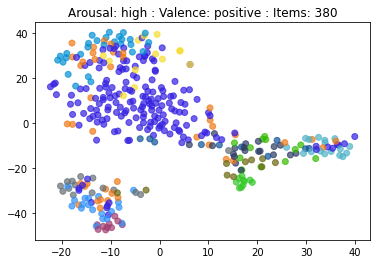

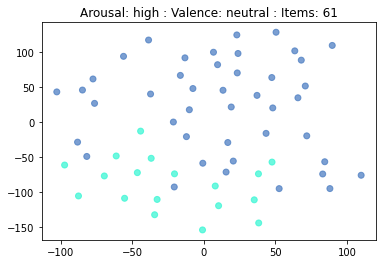

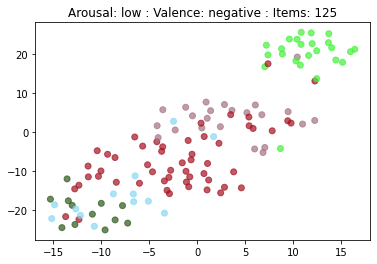

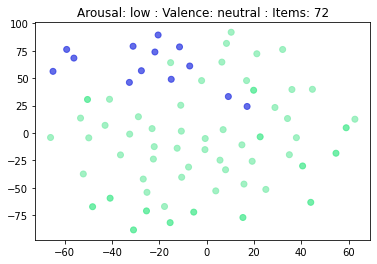

In [319]:
# Visualising clusters formed in each Quadrant
for df_sample in df_brand_quads:
  title = f"Arousal: {df_sample.iloc[0]['arousal']}"
  title += f" : Valence: {df_sample.iloc[0]['valence']}"
  title += f" : Items: {len(df_sample)}"
  
  dimensions_2d = get_reduced_embeddings_dimensions(df_sample.babbage_similarity.to_list())
  plot_embeddings(df_sample, dimensions_2d, title=title)
  print("\n\n")

### **Homdox BRAND ANALYSIS**


In [320]:
# Filtering the dataset based on Brand & Labelling Valence + Arousal using trained models
df_brand = get_brand_emotion_analysis(df, "Homdox")

Converting Embeddings !
Predicting Labels for Valence & Arousal !


In [321]:
df_brand.head()

,review_id,review_header,review_text,author_name,review_asin,author_link,author_id,rating,review_posted_date,review_posted_date_f,...,asin,warning,combined,n_tokens,babbage_similarity,is_labeled,arousal_code,arousal,valence_code,valence
10765,RU3FXD0N38PR3,Awesome,This grinder is awesome in my opinion. Works g...,neidy,B08FR7HNYF,/gp/profile/amzn1.account.AEWYFWV4OJ746C6AA4YJ...,AEWYFWV4OJ746C6AA4YJ5QFMJT2A,5.0,"August 27, 2020",2020-08-27T00:00:00.000Z,...,B08FR7HNYF,NaN,Title: Awesome; Content: This grinder is aweso...,31.0,"[0.011907163076102734, 0.004691956099122763, 0...",NaN,0,high,2,positive
10787,RLNJMQ7Z4CPXK,Kaputt,Hallo! Leider ist das Schälchen zerbrochen! Wa...,Amazon Kunde,B085Y9DV68,NaN,NaN,1.0,"January 15, 2021",2021-01-15T00:00:00.000Z,...,B085Y9DV68,NaN,Title: Kaputt; Content: Hallo! Leider ist das ...,28.0,"[0.011400998570024967, 0.010601906105875969, -...",NaN,0,high,1,neutral
10788,R5F8JLRS7Y8H,Very small,It was much smaller than the image made out,Amazon Customer,B085Y9DV68,NaN,NaN,2.0,"March 7, 2021",2021-03-07T00:00:00.000Z,...,B085Y9DV68,NaN,Title: Very small; Content: It was much smalle...,16.0,"[0.0023578605614602566, 0.018035566434264183, ...",NaN,1,low,1,neutral
10789,R229YGWKKX4LJ2,Beautiful,Beautiful bowl! Very pleased with my purchase....,Kindle Customer,B085Y9DV68,NaN,NaN,5.0,"August 25, 2020",2020-08-25T00:00:00.000Z,...,B085Y9DV68,NaN,Title: Beautiful; Content: Beautiful bowl! Ver...,39.0,"[0.0005739745683968067, 0.008354166522622108, ...",NaN,0,high,2,positive
10790,R1Z5D3WLBA5ZY1,beautiful bowl,Love this little bowl. Haven't used it yet. Bu...,Matthew,B085Y9DV68,NaN,NaN,5.0,"August 19, 2020",2020-08-19T00:00:00.000Z,...,B085Y9DV68,NaN,Title: beautiful bowl; Content: Love this litt...,64.0,"[0.0013688417384400964, 0.006865339819341898, ...",NaN,0,high,2,positive


In [322]:
df_brand.shape

(959, 24)

```
Each combination, i.e. (high, positive) represents a quadrant. 
The keys and their count reflect on the detail of how the brand is doing.

For example: Having quadrant (('high', 'positive')) with highest count:
Means most of the people are talking about product with happiness and excitement and so on.
```

In [323]:
# All possible combinations/quadrants with their to understand user emotions shape
all_emotion_combinations = dict(df_brand[["arousal", "valence"]].value_counts())
all_emotion_combinations

{('high', 'positive'): 592,
 ('low', 'negative'): 146,
 ('high', 'neutral'): 131,
 ('low', 'neutral'): 69,
 ('high', 'negative'): 21}

In [324]:
# Printing reviews in each quadrant to understand user's concerns and check for relevancy/quality
print("Analysis of each Valence & Arousal Combination Quadrants:\n\n")
print_reviews_from_combinations(df_brand, all_emotion_combinations)

Analysis of each Valence & Arousal Combination Quadrants:


Arousal: high	Valence: positive	Number of Reviews: 592
****************************************************************************************************
Review Heading:  Works Great
Review Text:  Time will be the true test but it does everything as advertised!
Review Rating:  5.0
----------------------------------------------------------------------------------------------------
Review Heading:  Very happy with my purchase. Thank you.
Review Text:  I use mine for polymer clay and other crafting. It’s nicer than the on
Review Rating:  5.0
----------------------------------------------------------------------------------------------------
Review Heading:  Good helper for cleaning
Review Text:  The electric pressure washer used in our house for 1 year was broken, 
Review Rating:  5.0
----------------------------------------------------------------------------------------------------



*****************************************

In [325]:
# Making clusters in each Quadrant/Combinations, i.e. (high, positive)
all_quadrant_clusters = make_clusters_for_each_combination(df_brand, 
                                                            all_emotion_combinations,
                                                            10, 0.85)

{('high', 'positive'): 592}
{('low', 'negative'): 146}
{('high', 'neutral'): 131}
{('low', 'neutral'): 69}
{('high', 'negative'): 21}


In [326]:
len(all_quadrant_clusters)

5

In [327]:
# Visualsing sample of reviews from the clusters formed in each Quadrant
for i, comb in enumerate(all_emotion_combinations):
  if len(all_quadrant_clusters[i]) > 0:
    print(f"Arousal: {comb[0]}\tValence: {comb[1]}\tTotal Clusters: {len(all_quadrant_clusters[i])}")
    print_fast_clustered_reviews(df_brand, all_quadrant_clusters[i])

    print("*" * 100)
    print("\n\n")

Arousal: high	Valence: positive	Total Clusters: 15

Cluster 1, #120 Elements 
	 REVIEW HEADER:  Looks real | REVIEW TEXT:  Looks real, great buy
	 REVIEW HEADER:  No connection to standard garden hose | REVIEW TEXT:  Seems inconceivable that the connection does not fit a standard garden
	 REVIEW HEADER:  Popcorn Everywhere!! | REVIEW TEXT:  Looks nice. The funnel part of the top is to short & wide. Even with a

Cluster 2, #38 Elements 
	 REVIEW HEADER:  Product worked as advertised... | REVIEW TEXT:  Was able to clean my mothers home and fence with ease.. the most impre
	 REVIEW HEADER:  Very funny | REVIEW TEXT:  Hilarious 😂
	 REVIEW HEADER:  Five Stars | REVIEW TEXT:  Love and came faster than expected date

Cluster 3, #32 Elements 
	 REVIEW HEADER:  Performs as expected but tend to tip over | REVIEW TEXT:  The unit is light and easily tips over.
	 REVIEW HEADER:  substancial product | REVIEW TEXT:  love it
	 REVIEW HEADER:  about as much power as you're going to find in an electric 

In [328]:
# Mapping all the cluster indexs onto dataframe format for further manipulation
df_brand_quads = map_quadrant_clusters_to_df(df_brand, all_quadrant_clusters, all_emotion_combinations)

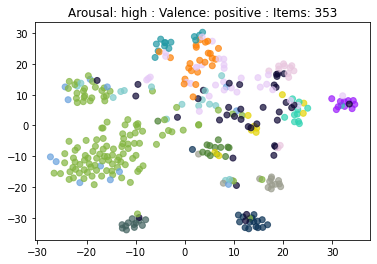

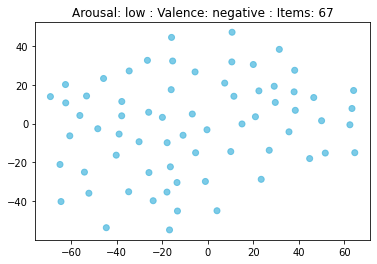

In [329]:
# Visualising clusters formed in each Quadrant
for df_sample in df_brand_quads:
  title = f"Arousal: {df_sample.iloc[0]['arousal']}"
  title += f" : Valence: {df_sample.iloc[0]['valence']}"
  title += f" : Items: {len(df_sample)}"
  
  dimensions_2d = get_reduced_embeddings_dimensions(df_sample.babbage_similarity.to_list())
  plot_embeddings(df_sample, dimensions_2d, title=title)
  print("\n\n")